# АиФ "Доброе сердце". ВНИМАНИЕ! Проект висит в доработе и может проверяться только до начала RFM

## Описание проекта
О проекте
Благотворительный фонд [АиФ Доброе сердце](https://dobroe.aif.ru/about-us/) хочет лучше узнать своих благотворителей, чтобы максимально эффективно выстроить свою работу с ними. По итогу заказчик хочет следующие результаты:
- Сегменты пользователей: RFM-анализ, описание сегментов;  
- Портрет типичного пользователя (возраст, регион, прочие параметры);  
- Каналы привлечения пользователей и их эффективность;  
- Узнать эффективность рассылок;  
- Информацию об исторических пользователях.  

Для анализа представлены следующие данные:  
- данные о каналах привлечения пользователей;  
- кодировка каналов привлечения пользователей;  
- данные о платежах пользователей;  
- данные о пользователях;  
- данные об историческом импорте (давние пользователи).  


## Описание данных  
**Структура id_donor.csv(информация о донорах)**  
`CustomerCustomFieldsRecurrent` - Рекуррент да / нет  
`CustomerCustomFieldsVolunteer` - Волонтер да / нет  
`CustomerSex` - Пол пользователя  
`CustomerAreaIdsExternalId` - Идентификатор региона пользователя  
`CustomerAreaName` - Название региона пользователя  
`CustomerIanaTimeZone` - Часовой пояс пользователя  
`CustomerTimeZoneSource` - Источник данных о часовом поясе  
`CustomerIdsMindboxId` - Идентификатор пользователя  
`CustomerIsEmailInvalid` - Почта невалидна да / нет  
`CustomerChangeDateTimeUtc` - Дата регистрации / редактирования  
`CustomerCustomerSubscriptions DobroaifIsSubscribed` - Подписка 11  
`CustomerCustomerSubscriptions DobroaifSmsIsSubscribed` - Подписка в точке контакта SMS12  
`CustomerCustomerSubscriptions DobroaifEmailIsSubscribed` - Подписка в точке контакта email  
`CustomerCustomerSubscriptions DobroaifViberIsSubscribed` - Подписка в точке контакта Viber14  
`CustomerCustomerSubscriptions DobroaifMobilePushIsSubscribed` - Подписка в точке контакта Mobile Push15  
`CustomerCustomerSubscriptions DobroaifWebPushIsSubscribed` - Подписка в точке контакта Web Push  




**Структура import.csv (информация об историческом импорте)**  
`CustomerActionCustomerIdsMindboxId`- Идентификатор пользователя

В историческом импорте нас интересуют только идентификаторы пользователей, для их использования в остальных датасетах.

**Структура order.csv (информация о пожертвованиях)**  
`OrderIdsMindboxId` - Идентификатор платежа  
`OrderFirstActionIdsMindboxId` - Идентификатор действия   
`OrderFirstActionDateTimeUtc` - Дата и время оформления заказа  
`OrderFirstActionChannelIdsMindboxId` - Идентификатор точки контакта  
`OrderFirstActionChannelIdsExternalId` - Внешний идентификатор точки контакта  
`OrderFirstActionChannelName` - Наименование точки контакта  
`OrderAreaIdsExternalId` - Идентификатор региона пользователя  
`OrderTransactionIdsExternalId` - Внешний идентификатор транзакции  
`OrderTotalPrice` - Стоимость заказа  
`OrderIdsWebsiteID` - Идентификатор заказа на сайте  
`OrderCustomFieldsNewyear` - Наличие поля с новым годом  
`OrderCustomFieldsNextPayDate` - Дата следующего списания денег  
`OrderCustomFieldsRecurrent` - Рекурент да / нет  
`OrderCustomFieldsRepayment` - Повторный платеж  
`OrderLineProductIdsWebsite` - Идентификатор продукта на сайте  
`OrderLineProductName` - Название продукта  
`OrderLineQuantity` - Количество единиц продукта  
`OrderLineBasePricePerItem` - Базовая цена за единицу продукта  
`OrderLinePriceOfLine` - Итоговая цена  
`OrderLineStatusIdsExternalId` - Идентификатор статуса позиции заказа  
`OrderCustomerIdsMindboxId` - Идентификатор пользователя 

**Структура channels.csv(информация о каналах привлечения пользователей)**  
`User_action` - Название действия пользователя  
`Action_date` - Дата действия пользователя  
`Channel_id` - Идентификатор канала (описание в текстовом файле)  
`Utm_campaign` - Кампания   
`Utm_source` - Ресурс   
`Utm_medium` - Что-то дублирующееся  
`User_id` - Идентификатор пользователя  
`Action_time` - Час действия пользователя 

Административный сайт Mindbox - это Unisender, им пользовались до весны 2022г, а Сайт - от MindBox, сюда перешли после и до сих пор функционируют

Идеи: посмотреть запросы по АиФ дорое сердце и оценить трафики с гугл и яндекс. Посмотреть эффективность предыдущего RFM анализа: из pickle, проанализировать отписки

## Загрузка данных

### Импорт библиотек

In [300]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from datetime import datetime, timedelta
import json
import numpy as np
import math as mth
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime, timedelta
import scipy.stats as st
from plotly import graph_objects as go
import plotly.express as px

### Общий обзор

In [301]:
def watch_basics(df):
    """
    Отображает базовую информацию о датасете
    """
    print('---Общая информация---')
    display(df.head())
    display(df.info())
    print('---Пропуски---')
    if not (df.isna().sum() > 0).any():
        print('Пропусков не найдено')
    else:
        display(df.isna().sum())
    print('---Явные дубликаты---')
    display(df[df.duplicated()].count().all())
    

In [302]:
id_donor = pd.read_csv('id_donor.csv',sep=';',encoding='cp1251')
watch_basics(id_donor)

---Общая информация---


,CustomerCustomFieldsRecurrent = Рекуррент,CustomerCustomFieldsVolunteer = Волонтер да/нет,CustomerSex = Пол,CustomerAreaIdsExternalId = Идентификатор географической зоны клиента,CustomerAreaName = Название географической зоны клиента,CustomerIanaTimeZone = Часовой пояс,CustomerTimeZoneSource = Источник информации о часовом поясе,CustomerIdsMindboxId = Идентификатор Mindbox,CustomerIsEmailInvalid = Адрес электронной почты невалиден,CustomerChangeDateTimeUtc = Дата регистрации/редактирования в формате yyyy-MM-dd HH:mm:ss.fff,CustomerCustomerSubscriptionsDobroaifIsSubscribed = Подписка,CustomerCustomerSubscriptionsDobroaifSmsIsSubscribed = Подписка в точке контакта SMS,CustomerCustomerSubscriptionsDobroaifEmailIsSubscribed = Подписка в точке контакта Email,CustomerCustomerSubscriptionsDobroaifViberIsSubscribed = Подписка в точке контакта Viber,CustomerCustomerSubscriptionsDobroaifMobilePushIsSubscribed = Подписка в точке контакта MobilePush,CustomerCustomerSubscriptionsDobroaifWebPushIsSubscribed = Подписка в точке контакта WebPush
0,NaN,NaN,female,75,Ульяновская область,Europe/Samara,Определили в трекере,2734,False,21.05.2023 13:19,NaN,NaN,True,NaN,NaN,NaN
1,False,NaN,female,63,Санкт-Петербург и ЛО,Europe/Moscow,Определили в трекере,2847,False,24.12.2023 5:41,NaN,NaN,True,NaN,NaN,NaN
2,NaN,NaN,female,Москва и МО,Москва и МО,Europe/Moscow,Определили в трекере,2861,False,10.03.2023 8:16,NaN,True,True,NaN,NaN,NaN
3,NaN,NaN,female,60,Ростовская область,Europe/Moscow,Определили в трекере,3361,True,20.12.2022 9:36,NaN,NaN,False,NaN,NaN,NaN
4,False,NaN,male,31,Москва и МО,Europe/Moscow,Определили в трекере,4982,False,18.12.2023 19:43,NaN,NaN,True,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 16 columns):
 #   Column                                                                                              Non-Null Count  Dtype 
---  ------                                                                                              --------------  ----- 
 0   CustomerCustomFieldsRecurrent = Рекуррент                                                           5923 non-null   object
 1   CustomerCustomFieldsVolunteer =  Волонтер да/нет                                                    6 non-null      object
 2   CustomerSex = Пол                                                                                   18715 non-null  object
 3   CustomerAreaIdsExternalId = Идентификатор географической зоны клиента                               5044 non-null   object
 4   CustomerAreaName = Название географической зоны клиента                                             5044 non-null   ob

None

---Пропуски---


CustomerCustomFieldsRecurrent = Рекуррент                                                             17897
CustomerCustomFieldsVolunteer =  Волонтер да/нет                                                      23814
CustomerSex = Пол                                                                                      5105
CustomerAreaIdsExternalId = Идентификатор географической зоны клиента                                 18776
CustomerAreaName = Название географической зоны клиента                                               18776
CustomerIanaTimeZone = Часовой пояс                                                                   12197
CustomerTimeZoneSource = Источник информации о часовом поясе                                          12197
CustomerIdsMindboxId = Идентификатор Mindbox                                                              0
CustomerIsEmailInvalid = Адрес электронной почты невалиден                                              424
CustomerChangeDateTimeUtc = 

---Явные дубликаты---


False

In [303]:
import_df = pd.read_csv('import.csv',sep=';',encoding='cp1251')
watch_basics(import_df)

---Общая информация---


,CustomerActionIdsMindboxId,CustomerActionActionTemplateIdsSystemName,CustomerActionActionTemplateName,CustomerActionDateTimeUtc,CustomerActionCreationDateTimeUtc,CustomerActionBrandIdsSystemName,CustomerActionChannelIdsMindboxId,CustomerActionChannelName,CustomerActionChannelIdsExternalId,CustomerActionChannelIdsSystemName,CustomerActionChannelUtmCampaign,CustomerActionChannelUtmSource,CustomerActionChannelUtmMedium,CustomerActionChannelUtmContent,CustomerActionChannelUtmTerm,CustomerActionCustomerIdsBackendID,CustomerActionCustomerIdsWebsiteID,CustomerActionCustomerIdsMindboxId
0,2734,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:30,19.03.2022 21:30,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2734
1,2847,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:31,19.03.2022 21:31,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2847
2,241801,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,30.06.2022 11:10,30.06.2022 11:10,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2861
3,2861,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:31,19.03.2022 21:31,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2861
4,3361,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:31,19.03.2022 21:31,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3361


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7651 entries, 0 to 7650
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   CustomerActionIdsMindboxId                 7651 non-null   int64  
 1   CustomerActionActionTemplateIdsSystemName  7651 non-null   object 
 2   CustomerActionActionTemplateName           7651 non-null   object 
 3   CustomerActionDateTimeUtc                  7651 non-null   object 
 4   CustomerActionCreationDateTimeUtc          7651 non-null   object 
 5   CustomerActionBrandIdsSystemName           7651 non-null   object 
 6   CustomerActionChannelIdsMindboxId          7651 non-null   int64  
 7   CustomerActionChannelName                  7651 non-null   object 
 8   CustomerActionChannelIdsExternalId         7651 non-null   object 
 9   CustomerActionChannelIdsSystemName         7651 non-null   object 
 10  CustomerActionChannelUtm

None

---Пропуски---


CustomerActionIdsMindboxId                      0
CustomerActionActionTemplateIdsSystemName       0
CustomerActionActionTemplateName                0
CustomerActionDateTimeUtc                       0
CustomerActionCreationDateTimeUtc               0
CustomerActionBrandIdsSystemName                0
CustomerActionChannelIdsMindboxId               0
CustomerActionChannelName                       0
CustomerActionChannelIdsExternalId              0
CustomerActionChannelIdsSystemName              0
CustomerActionChannelUtmCampaign             7651
CustomerActionChannelUtmSource               7651
CustomerActionChannelUtmMedium               7651
CustomerActionChannelUtmContent              7651
CustomerActionChannelUtmTerm                 7651
CustomerActionCustomerIdsBackendID           7651
CustomerActionCustomerIdsWebsiteID           7651
CustomerActionCustomerIdsMindboxId              0
dtype: int64

---Явные дубликаты---


False

Очевидно, информации здесь не так много. Но эта таблица и не для этого

In [304]:
order = pd.read_csv('order.csv',sep=';',encoding='cp1251')
watch_basics(order)

---Общая информация---


,OrderIdsMindboxId = Идентификатор Mindbox,OrderFirstActionIdsMindboxId = Идентификатор Mindbox,OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC,OrderFirstActionChannelIdsMindboxId = Идентификатор Mindbox,OrderFirstActionChannelIdsExternalId = Внешний идентификатор точки контакта,OrderFirstActionChannelName = Имя точки контакта,OrderAreaIdsExternalId = Идентификатор географической зоны клиента,OrderTransactionIdsExternalId = Идентификатор транзакции,OrderTotalPrice = Стоимость заказа,OrderIdsWebsiteID = Идентификатор заказа на сайте,...,OrderCustomFieldsNextPayDate = Дата след. Списания,OrderCustomFieldsRecurrent = Регулярный да/нет,OrderCustomFieldsRepayment = Повторный рекуррент,OrderLineProductIdsWebsite = Id продукта в Сайт,OrderLineProductName = Техническое название продукта,OrderLineQuantity = Количество единиц продукта,OrderLineBasePricePerItem = Базовая цена продукта за единицу продукта,OrderLinePriceOfLine = Конечная цена,OrderLineStatusIdsExternalId = Идентификатор статуса позиции заказа,OrderCustomerIdsMindboxId = Идентификатор Mindbox
0,14588,57400,27.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,500,1002892689,...,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,500,Paid,6959
1,14756,57577,29.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,200,1004662779,...,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,200,Paid,7103
2,14979,57807,31.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,300,1006728077,...,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,300,Paid,7321
3,15101,57933,06.02.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,300,1011786329,...,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,300,Paid,7143
4,16216,59062,28.02.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,50,1037151115,...,NaN,NaN,NaN,1,На уставную деятельность,1,NaN,50,Paid,7079


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73763 entries, 0 to 73762
Data columns (total 21 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   OrderIdsMindboxId = Идентификатор Mindbox                                    73763 non-null  int64  
 1   OrderFirstActionIdsMindboxId = Идентификатор Mindbox                         73763 non-null  int64  
 2   OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC          73763 non-null  object 
 3   OrderFirstActionChannelIdsMindboxId = Идентификатор Mindbox                  73763 non-null  int64  
 4   OrderFirstActionChannelIdsExternalId = Внешний идентификатор точки контакта  73763 non-null  object 
 5   OrderFirstActionChannelName = Имя точки контакта                             73763 non-null  object 
 6   OrderAreaIdsExternalId = Идентификатор

None

---Пропуски---


OrderIdsMindboxId = Идентификатор Mindbox                                          0
OrderFirstActionIdsMindboxId = Идентификатор Mindbox                               0
OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC                0
OrderFirstActionChannelIdsMindboxId = Идентификатор Mindbox                        0
OrderFirstActionChannelIdsExternalId = Внешний идентификатор точки контакта        0
OrderFirstActionChannelName = Имя точки контакта                                   0
OrderAreaIdsExternalId = Идентификатор географической зоны клиента             73763
OrderTransactionIdsExternalId = Идентификатор транзакции                       73763
OrderTotalPrice = Стоимость заказа                                                 0
OrderIdsWebsiteID = Идентификатор заказа на сайте                                  0
OrderCustomFieldsNewyear = newyear                                             71882
OrderCustomFieldsNextPayDate = Дата след. Списания               

---Явные дубликаты---


False

In [305]:
unpickled_data = pd.read_pickle('channels.pkl')

In [306]:
watch_basics(unpickled_data)

---Общая информация---


,user_action,action_date,channel_id,utm_campaign,utm_source,utm_medium,user_id,action_time
0,Копия Фандрайзинговая. Максим Широкин,2022-12-20,3,NaN,NaN,NaN,2734,7
1,Копия Фандрайзинговая. Максим Широкин Не доста...,2022-12-20,3,NaN,NaN,NaN,2734,7
2,Копия Фандрайзинговая. Максим Широкин Отправка,2022-12-20,3,NaN,NaN,NaN,2734,7
3,Копия Копия Фандрайзинговая. Максим Широкин,2022-12-26,3,NaN,NaN,NaN,2734,11
4,Копия Копия Фандрайзинговая. Максим Широкин Не...,2022-12-26,3,NaN,NaN,NaN,2734,11


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2864953 entries, 0 to 873421
Data columns (total 8 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_action   object
 1   action_date   object
 2   channel_id    int64 
 3   utm_campaign  object
 4   utm_source    object
 5   utm_medium    object
 6   user_id       int64 
 7   action_time   int32 
dtypes: int32(1), int64(2), object(5)
memory usage: 185.8+ MB


None

---Пропуски---


user_action           0
action_date           0
channel_id            0
utm_campaign    2815634
utm_source      2815634
utm_medium      2815634
user_id               0
action_time           0
dtype: int64

---Явные дубликаты---


True

In [307]:
# считаем словарь из текстового файла
channels_dict = eval(open('channels_dict.txt', 'r', encoding='utf-8').read())

## Обработка

### id_donor

In [308]:
id_donor.columns

Index(['CustomerCustomFieldsRecurrent = Рекуррент',
       'CustomerCustomFieldsVolunteer =  Волонтер да/нет', 'CustomerSex = Пол',
       'CustomerAreaIdsExternalId = Идентификатор географической зоны клиента',
       'CustomerAreaName = Название географической зоны клиента',
       'CustomerIanaTimeZone = Часовой пояс',
       'CustomerTimeZoneSource = Источник информации о часовом поясе',
       'CustomerIdsMindboxId = Идентификатор Mindbox',
       'CustomerIsEmailInvalid = Адрес электронной почты невалиден',
       'CustomerChangeDateTimeUtc = Дата регистрации/редактирования в формате yyyy-MM-dd HH:mm:ss.fff',
       'CustomerCustomerSubscriptionsDobroaifIsSubscribed = Подписка',
       'CustomerCustomerSubscriptionsDobroaifSmsIsSubscribed = Подписка в точке контакта SMS',
       'CustomerCustomerSubscriptionsDobroaifEmailIsSubscribed = Подписка в точке контакта Email',
       'CustomerCustomerSubscriptionsDobroaifViberIsSubscribed = Подписка в точке контакта Viber',
       'Custo

In [309]:
id_donor.rename(
    columns={
        'CustomerCustomFieldsRecurrent = Рекуррент':'recurrent', 
        'CustomerCustomFieldsVolunteer =  Волонтер да/нет': 'volunteer',
        'CustomerSex = Пол': 'sex',
        'CustomerAreaIdsExternalId = Идентификатор географической зоны клиента':'area_id',
        'CustomerAreaName = Название географической зоны клиента':'area_name',
        'CustomerIanaTimeZone = Часовой пояс':'timezone',
        'CustomerTimeZoneSource = Источник информации о часовом поясе': 'time_source',
        'CustomerIdsMindboxId = Идентификатор Mindbox': 'id',
        'CustomerIsEmailInvalid = Адрес электронной почты невалиден': 'inval_email',
        'CustomerChangeDateTimeUtc = Дата регистрации/редактирования в формате yyyy-MM-dd HH:mm:ss.fff':'utc_datetime',
        'CustomerCustomerSubscriptionsDobroaifIsSubscribed = Подписка': 'sub',
        'CustomerCustomerSubscriptionsDobroaifSmsIsSubscribed = Подписка в точке контакта SMS':'sub_sms',
        'CustomerCustomerSubscriptionsDobroaifEmailIsSubscribed = Подписка в точке контакта Email':'sub_email',
        'CustomerCustomerSubscriptionsDobroaifViberIsSubscribed = Подписка в точке контакта Viber':'sub_viber',
    'CustomerCustomerSubscriptionsDobroaifMobilePushIsSubscribed = Подписка в точке контакта MobilePush':'sub_MobilePush',
    'CustomerCustomerSubscriptionsDobroaifWebPushIsSubscribed = Подписка в точке контакта WebPush':'sub_WebPush'},
    inplace=True)

In [310]:
#Если пользователь действительно имеет подписку(т.е. рекуррент), то оставит данные. Можно считать, 
#что пропуски - это нерекуррентыЕсли пользователь действительно имеет подписку(т.е. рекуррент), то оставит данные.
#Можно считать, что пропуски - это нерекурренты
id_donor.loc[id_donor['recurrent'].isna(), 'recurrent'] = False

In [311]:
# аналогично с волонтерами - люди обязаны заполнять 
id_donor.loc[id_donor['volunteer'].isna(),'volunteer'] = False
# имеется столбец имейла, но невалидна - значит, ее не нашла система или осталась просто не подтвержлена. Посмотрим сколько таких
print('Проблемы с почтой у',  (id_donor['inval_email'] == False).sum(), 'человек')

Проблемы с почтой у 21474 человек


In [312]:
id_donor[~id_donor['area_id'].isna()].sort_values(by='area_id',ascending=True)

,recurrent,volunteer,sex,area_id,area_name,timezone,time_source,id,inval_email,utc_datetime,sub,sub_sms,sub_email,sub_viber,sub_MobilePush,sub_WebPush
1050,False,False,female,100,Балаково,NaN,NaN,14356,False,15.01.2024 7:27,NaN,NaN,False,NaN,NaN,NaN
1168,False,False,female,100,Балаково,Etc/GMT-3,Определили в трекере,14904,False,17.02.2024 17:54,NaN,NaN,True,NaN,NaN,NaN
1211,False,False,NaN,101,Балахна,NaN,NaN,15097,False,26.05.2022 9:11,NaN,NaN,True,NaN,NaN,NaN
2390,False,False,male,102,Балашиха,Europe/Moscow,Определили в трекере,18368,False,01.06.2022 21:03,NaN,NaN,True,NaN,NaN,NaN
90,False,False,male,104,Белгород,NaN,NaN,8338,False,19.03.2022 21:32,NaN,NaN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,False,False,male,Москва и МО,Москва и МО,Europe/Moscow,Определили в трекере,9165,False,19.12.2023 17:26,NaN,True,True,NaN,NaN,NaN
2,False,False,female,Москва и МО,Москва и МО,Europe/Moscow,Определили в трекере,2861,False,10.03.2023 8:16,NaN,True,True,NaN,NaN,NaN
787,False,False,female,Новосибирская область,Новосибирская область,Asia/Krasnoyarsk,Определили в трекере,13001,False,18.12.2023 13:12,NaN,True,True,NaN,NaN,NaN
3426,False,False,female,Республика Хакасия,Республика Хакасия,Asia/Krasnoyarsk,Определили в трекере,20139,False,01.01.2024 22:29,NaN,True,True,NaN,NaN,NaN


In [313]:
# смотря на данные заметно, что в area_id не только пропуски, но и заполнение string 
# посмотрим на географические зоны
temp = id_donor['area_name'].unique()
display(temp)
len(temp)

array(['Ульяновская область', 'Санкт-Петербург и ЛО', 'Москва и МО',
       'Ростовская область', 'Москва', nan, 'Абакан', 'Санкт-Петербург',
       'Волгоград', 'Краснодар', 'Тверь', 'Ярославль', 'Химки',
       'Тольятти', 'Воронеж', 'Барнаул (84)', 'Екатеринбург',
       'Нижегородская область', 'Vienna', 'Самара', 'Люберцы',
       'Владикавказ', 'Улан-Удэ', 'Видное', 'Нижний Новгород',
       'Новосибирск', 'Рязань', 'Белгород', 'Владивосток',
       'Южно-Сахалинск', 'Астрахань', 'Тамбов', 'Орел', 'Якутск',
       'Апатиты', 'Истра', 'Уфа', 'Республика Башкортостан', 'Калуга',
       'Ставрополь', 'Брянск', 'Салават', 'Киев', 'Тула', 'Аксай',
       'Челябинск', 'Томилино', 'Ростов-на-Дону', 'Махачкала', 'Сочи',
       'Вышний Волочек', 'Тюмень', 'South Bend', 'Одинцово', 'Brezova',
       'Казань', 'Иркутск', 'Великий Новгород', 'Хабаровск', 'Курган',
       'Новороссийск', 'Ульяновск', 'Симферополь', 'Сыктывкар',
       'Владимир', 'Калининград', 'Саратов', 'Подольск', 'Киров',

192

In [314]:
# Посмотрим на соответствие идентификаторы региона
dict_area_id = pd.Series(id_donor.area_name.values,index=id_donor.area_id).to_dict()
display(dict_area_id)
len(dict_area_id)

{'75': 'Ульяновская область',
 '63': 'Санкт-Петербург и ЛО',
 'Москва и МО': 'Москва и МО',
 '60': 'Ростовская область',
 '31': 'Москва и МО',
 '201': 'Москва',
 nan: nan,
 '86': 'Абакан',
 '250': 'Санкт-Петербург',
 '122': 'Волгоград',
 '178': 'Краснодар',
 '282': 'Тверь',
 '316': 'Ярославль',
 '300': 'Химки',
 '284': 'Тольятти',
 '124': 'Воронеж',
 '84': 'Барнаул (84)',
 '139': 'Екатеринбург',
 '34': 'Нижегородская область',
 '337': 'Vienna',
 '249': 'Самара',
 '191': 'Люберцы',
 '120': 'Владикавказ',
 '289': 'Улан-Удэ',
 '118': 'Видное',
 '213': 'Нижний Новгород',
 '217': 'Новосибирск',
 '246': 'Рязань',
 '104': 'Белгород',
 '119': 'Владивосток',
 '313': 'Южно-Сахалинск',
 '99': 'Астрахань',
 '273': 'Тамбов',
 '226': 'Орел',
 '314': 'Якутск',
 '91': 'Апатиты',
 '152': 'Истра',
 '292': 'Уфа',
 '46': 'Республика Башкортостан',
 '157': 'Калуга',
 '267': 'Ставрополь',
 '114': 'Брянск',
 '247': 'Салават',
 '164': 'Киев',
 '287': 'Тула',
 '87': 'Аксай',
 '302': 'Челябинск',
 '285': 'Томил

194

Похоже, в словаре не хватает пары элементов, зато изветсно, что областей 194 и есть повторения для Москвы и МО. Это не является ошибкой, однако для анализа мешает. Проверим можем ли заполнить пропуски в столбце area_name. Также нам больше не понадобится area_id: несмотря на то, что с числами работать быстрее и проще, они дают меньшее понимание.

In [315]:
id_donor[(id_donor['area_id'].isna()) & (~id_donor['area_name'].isna())]

,recurrent,volunteer,sex,area_id,area_name,timezone,time_source,id,inval_email,utc_datetime,sub,sub_sms,sub_email,sub_viber,sub_MobilePush,sub_WebPush


Таких, что можно было бы заполнить в area_name нет, т.о. не понадобится area_id

In [316]:
del id_donor['area_id']

In [317]:
areas_df = id_donor['area_name'].value_counts()
display(areas_df.head(10))
other = areas_df[areas_df.values < areas_df[10]].sum()
areas_df = pd.concat([areas_df.head(3), pd.Series({'Другие': other})])

Vienna             2757
Москва              997
Санкт-Петербург     210
Краснодар            77
Екатеринбург         69
Нижний Новгород      53
Новосибирск          51
Южно-Сахалинск       45
Владивосток          44
Самара               39
Name: area_name, dtype: int64

Ожидалось, что первой будет Москва, однако больше всего человек из Вены, столицы Австрии. 

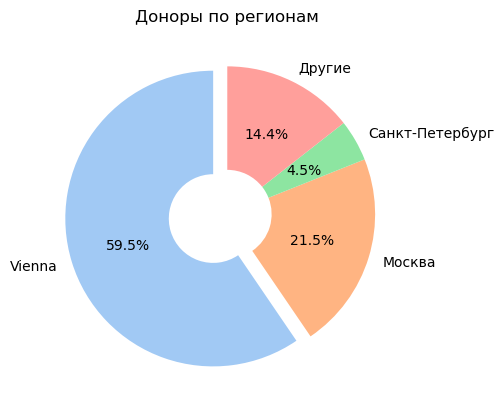

In [318]:
explode = (0.1,) + (0,)*3
colors = sns.color_palette('pastel')[ 0:10 ]

(areas_df.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors = colors, 
            wedgeprops=dict(width=0.7), explode= explode))
plt.ylabel('');
plt.title('Доноры по регионам');

In [319]:
id_donor['timezone'].unique()

array(['Europe/Samara', 'Europe/Moscow', nan, 'Asia/Yekaterinburg',
       'Asia/Krasnoyarsk', 'Europe/Minsk', 'Asia/Vladivostok',
       'Europe/London', 'America/New_York', 'Asia/Yakutsk',
       'Asia/Irkutsk', 'Etc/GMT-10', 'Asia/Magadan', 'Asia/Sakhalin',
       'Europe/Volgograd', 'Etc/GMT-2', 'Asia/Shanghai',
       'America/Toronto', 'Europe/Istanbul', 'Etc/GMT-5', 'Asia/Yerevan',
       'Asia/Barnaul', 'Asia/Novosibirsk', 'Europe/Kaliningrad',
       'Europe/Vilnius', 'Europe/Kirov', 'UTC', 'Etc/GMT-3',
       'Asia/Riyadh', 'Asia/Kamchatka', 'Europe/Athens', 'Asia/Bangkok',
       'Asia/Baku', 'Asia/Chita', 'Europe/Saratov', 'Europe/Berlin',
       'Etc/GMT-6', 'Asia/Nicosia', 'Asia/Saigon', 'Europe/Simferopol',
       'Africa/Nairobi', 'Asia/Omsk', 'Europe/Vienna', 'Asia/Almaty',
       'Europe/Madrid', 'Europe/Kiev', 'Europe/Helsinki', 'Europe/Warsaw',
       'Asia/Tbilisi', 'Asia/Tomsk', 'Europe/Paris', 'Europe/Zurich',
       'America/Los_Angeles', 'Europe/Astrakhan', 'As

Поразительно, есть доноры даже с часовом поясом японии! Кажется очевидным, что большинство будет Европейского типа

In [320]:
id_donor['continent_time_area'] = id_donor['timezone'].map(lambda x: str(x)[:str(x).find('/')] if ~pd.isna(x) else None)

In [321]:
continent_time = id_donor.loc[~id_donor['continent_time_area'].isna(),'continent_time_area'].value_counts()
# из-за неправильной обработки пришлось исключить na
del continent_time['na']
continent_time

Europe       9162
Asia         2309
Etc            78
America        38
Africa         14
UT             12
Pacific         5
Australia       2
Indian          2
Atlantic        1
Name: continent_time_area, dtype: int64

In [322]:
other = continent_time[continent_time.values < continent_time[3]].sum()

In [323]:
continent_time = pd.concat([continent_time.head(2), pd.Series({'Другие': other})])

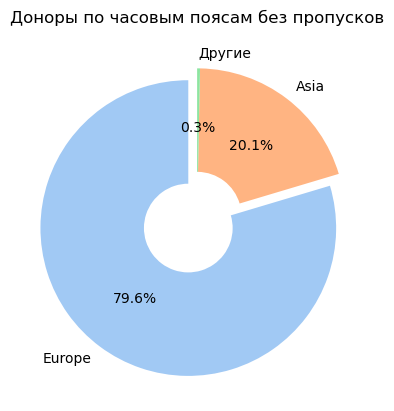

In [324]:
explode = (0.1,) + (0,)*2
colors = sns.color_palette('pastel')[ 0:10 ]

(continent_time.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors = colors, 
            wedgeprops=dict(width=0.7), explode= explode))
plt.ylabel('');
plt.title('Доноры по часовым поясам без пропусков');


Логично, что почти все доноры часового пояса Европы. Скорее всего и сами оттуда же

Интересно посмотреть на пол. Скорее всего, будут привалировать сердобольные женщины

In [325]:
(id_donor[~id_donor['sex'].isna()]['sex'].value_counts() / sum(~id_donor['sex'].isna()) * 100 \
                                                        ).apply( lambda x : str(round(x,2)) + '%')

female    77.0%
male      23.0%
Name: sex, dtype: object

Действительно, более чем в 3 раза больше

In [326]:
# посмотрим на города
id_donor['continent_town_area'] = id_donor['timezone'].map(lambda x: str(x)[str(x).find('/') + 1:] if ~pd.isna(x) else None)

In [327]:
continent_town = id_donor.loc[~id_donor['continent_town_area'].isna(),'continent_town_area'].value_counts()
# из-за неправильной обработки пришлось исключить na
del continent_town['nan']
continent_town

Moscow           8209
Yekaterinburg    1036
Samara            500
Krasnoyarsk       465
Novosibirsk       174
                 ... 
Melbourne           1
Faeroe              1
Majuro              1
Port_Moresby        1
Chisinau            1
Name: continent_town_area, Length: 99, dtype: int64

In [328]:
# выведем топ-5
other = continent_town[continent_town.values < continent_town[5]].sum()
continent_town = pd.concat([continent_town.head(4), pd.Series({'Другие': other})])

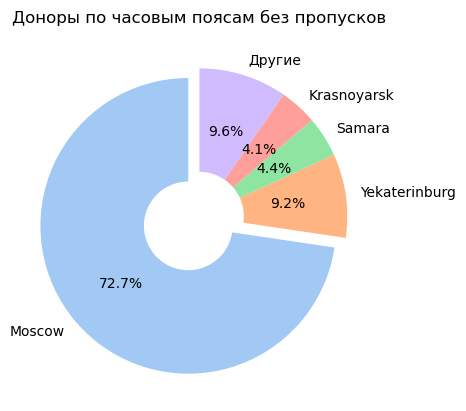

In [329]:
explode = (0.1,) + (0,)*4
colors = sns.color_palette('pastel')[ 0:10 ]

(continent_town.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors = colors, 
            wedgeprops=dict(width=0.7), explode= explode))
plt.ylabel('');
plt.title('Доноры по часовым поясам без пропусков');


Действительно, очень много доноров из Москвы. Можно было бы ожидать, что следующим будет Питер(как это часто бывает, поскольку эти 2 города идут в связке), но на 2 месте - Екатеринбург

Однако выше мы видели, что большинство доноров из Вены. Почему так произошло? При рассмотрении пользователей Вены и Москвы отдельно заметно, что иногда area_name = Vienna, и при этом timezone = Europe/Moscow. Это объясняет различие. Однако, не понятно почему так происходит

In [330]:
print('Количество волонтеров = ',id_donor['volunteer'].sum())
print('Количество рекурентов = ',id_donor['recurrent'].sum())
print('Всего человек = ', id_donor.shape[0])

Количество волонтеров =  6
Количество рекурентов =  645
Всего человек =  23820


Немного необычно, что на 23820 человек всего 6 волонтеров. Это,скорее всего, оъясняется ручным внесением в базу(тогда как многие столбы, например, пол, определяются автоматически). Рекурент - это пользователь с ежемесячной подпиской. Их гораздо больше волонтеров, но немного по сравнению с общим количеством человек. Похоже, доброжелатели предпочитают разовые пожертвования.

Если пользователь действительно имеет подписку(т.е. рекуррент), то оставит данные. Можно считать, что пропуски - это нерекурренты

In [331]:
id_donor[id_donor['area_name'] == 'Vienna'].head()

,recurrent,volunteer,sex,area_name,timezone,time_source,id,inval_email,utc_datetime,sub,sub_sms,sub_email,sub_viber,sub_MobilePush,sub_WebPush,continent_time_area,continent_town_area
42,False,False,male,Vienna,NaN,NaN,7519,False,26.05.2022 9:10,NaN,NaN,True,NaN,NaN,NaN,na,nan
60,False,False,female,Vienna,NaN,NaN,7893,False,19.03.2022 21:34,NaN,NaN,True,NaN,NaN,NaN,na,nan
84,False,False,female,Vienna,Europe/Moscow,Определили в трекере,8241,False,01.06.2022 14:44,NaN,NaN,True,NaN,NaN,NaN,Europe,Moscow
212,False,False,female,Vienna,NaN,NaN,9654,False,19.03.2022 21:33,NaN,NaN,True,NaN,NaN,NaN,na,nan
218,False,False,male,Vienna,NaN,NaN,9704,False,26.05.2022 9:10,NaN,NaN,True,NaN,NaN,NaN,na,nan


In [332]:
id_donor['date_datetime'] = pd.to_datetime(
    id_donor['utc_datetime'], format='%d.%m.%Y %H:%M') + pd.Timedelta('3h')
del id_donor['utc_datetime']
id_donor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   recurrent            23820 non-null  object        
 1   volunteer            23820 non-null  object        
 2   sex                  18715 non-null  object        
 3   area_name            5044 non-null   object        
 4   timezone             11623 non-null  object        
 5   time_source          11623 non-null  object        
 6   id                   23820 non-null  int64         
 7   inval_email          23396 non-null  object        
 8   sub                  20 non-null     object        
 9   sub_sms              44 non-null     object        
 10  sub_email            23478 non-null  object        
 11  sub_viber            20 non-null     object        
 12  sub_MobilePush       20 non-null     object        
 13  sub_WebPush          406 non-nu

In [333]:
id_donor['date'] = id_donor["date_datetime"].dt.date

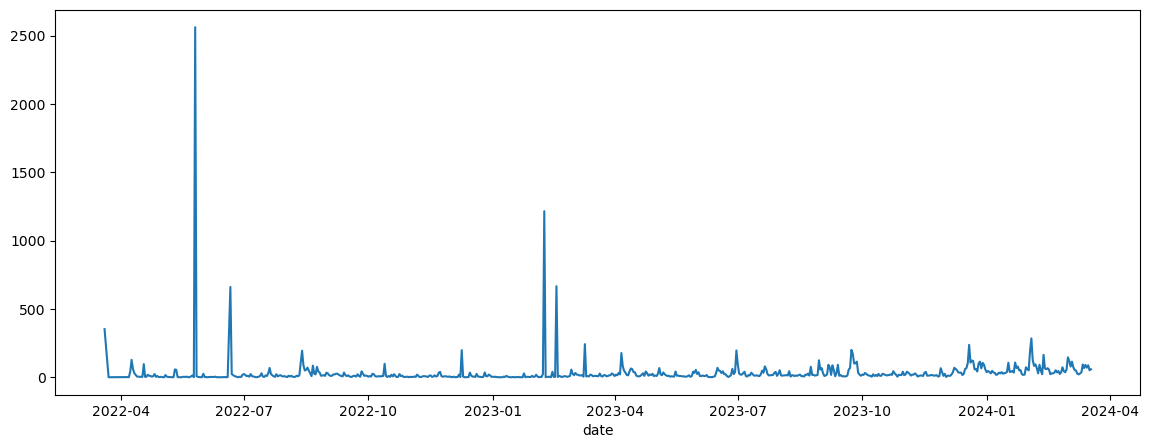

In [334]:
plt.figure(figsize=(14, 5))
id_donor.groupby('date')['date_datetime'].count().plot();

Очень много регистраций примерно в июне 2022 - пик. Также в феврале 2023 есть несколько. В 2024 данные становятся более шумными - возможно, стало больше человек, а другие всплески - это дни загрузки данных

In [335]:
id_donor['sub_email'].unique()

array([True, False, nan], dtype=object)

### import_df

In [336]:
import_df.head()

,CustomerActionIdsMindboxId,CustomerActionActionTemplateIdsSystemName,CustomerActionActionTemplateName,CustomerActionDateTimeUtc,CustomerActionCreationDateTimeUtc,CustomerActionBrandIdsSystemName,CustomerActionChannelIdsMindboxId,CustomerActionChannelName,CustomerActionChannelIdsExternalId,CustomerActionChannelIdsSystemName,CustomerActionChannelUtmCampaign,CustomerActionChannelUtmSource,CustomerActionChannelUtmMedium,CustomerActionChannelUtmContent,CustomerActionChannelUtmTerm,CustomerActionCustomerIdsBackendID,CustomerActionCustomerIdsWebsiteID,CustomerActionCustomerIdsMindboxId
0,2734,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:30,19.03.2022 21:30,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2734
1,2847,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:31,19.03.2022 21:31,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2847
2,241801,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,30.06.2022 11:10,30.06.2022 11:10,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2861
3,2861,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:31,19.03.2022 21:31,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2861
4,3361,ImportPriPerenoseIstoricheskoj,Импорт при переносе исторической базы клиентов,19.03.2022 21:31,19.03.2022 21:31,Dobroaif,9,Сайт,Site,Sajt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3361


В историческом импорте нас интересуют только идентификаторы пользователей - CustomerActionIdsMindboxId для использования в остальныз датасетах

Однако, глянем чуть подробнее) Столбцы _CustomerActionDateTimeUtc_ и _CustomerActionCreationDateTimeUtc_  имеют одни и те же данные, поэтому будем рассматривать только один

In [337]:
columns = import_df.columns
dont_print = ['CustomerActionIdsMindboxId', 'CustomerActionDateTimeUtc', 'CustomerActionCreationDateTimeUtc', 'CustomerActionCustomerIdsMindboxId']
for col in columns:
    if col not in dont_print:
        print('Уникальные ', col, ':', import_df[col].unique())

Уникальные  CustomerActionActionTemplateIdsSystemName : ['ImportPriPerenoseIstoricheskoj']
Уникальные  CustomerActionActionTemplateName : ['Импорт при переносе исторической базы клиентов']
Уникальные  CustomerActionBrandIdsSystemName : ['Dobroaif']
Уникальные  CustomerActionChannelIdsMindboxId : [9 1]
Уникальные  CustomerActionChannelName : ['Сайт' 'Административный сайт Mindbox']
Уникальные  CustomerActionChannelIdsExternalId : ['Site' 'Administrator']
Уникальные  CustomerActionChannelIdsSystemName : ['Sajt' 'Administrator']
Уникальные  CustomerActionChannelUtmCampaign : [nan]
Уникальные  CustomerActionChannelUtmSource : [nan]
Уникальные  CustomerActionChannelUtmMedium : [nan]
Уникальные  CustomerActionChannelUtmContent : [nan]
Уникальные  CustomerActionChannelUtmTerm : [nan]
Уникальные  CustomerActionCustomerIdsBackendID : [nan]
Уникальные  CustomerActionCustomerIdsWebsiteID : [nan]


Есть некий перенос с сайта, а есть перенос админом. Интересно, в чем различие?

CustomerActionChannelUtmCampaign, CustomerActionChannelUtmSource, CustomerActionChannelUtmMedium, CustomerActionChannelUtmContent, CustomerActionChannelUtmTerm, CustomerActionCustomerIdsBackendID, CustomerActionCustomerIdsWebsiteID не имеют вообще никаких данных  
CustomerActionActionTemplateIdsSystemName и CustomerActionActionTemplateName содержат одну и ту же информацию => один из столбцов тоже монжно удалить, та же история с CustomerActionChannelIdsExternalId и CustomerActionChannelIdsSystemName 

In [338]:
# удаление лишних столбцов
delete = ['CustomerActionChannelUtmCampaign', 'CustomerActionChannelUtmSource',\
          'CustomerActionChannelUtmMedium', 'CustomerActionChannelUtmContent',\
         'CustomerActionChannelUtmTerm', 'CustomerActionCustomerIdsBackendID',\
         'CustomerActionCustomerIdsWebsiteID', 'CustomerActionActionTemplateIdsSystemName',\
         'CustomerActionChannelIdsSystemName']
for name in delete:
    del import_df[name]

In [339]:
print('Базу перенесли с', import_df['CustomerActionDateTimeUtc'].min(), 'по', import_df['CustomerActionDateTimeUtc'].max())

Базу перенесли с 18.04.2022 14:41 по 30.06.2022 11:11


In [340]:
import_df['CustomerActionDateTimeUtc'] = pd.to_datetime(
    import_df['CustomerActionDateTimeUtc'], format='%d.%m.%Y %H:%M')

In [341]:
print('за', len(import_df['CustomerActionDateTimeUtc'].dt.date.unique()), 'дня')

за 4 дня


Странно, переносили почти челых 2 месяца, но работу выполнили всего за 4 дня

###  order

In [342]:
 order.head()

,OrderIdsMindboxId = Идентификатор Mindbox,OrderFirstActionIdsMindboxId = Идентификатор Mindbox,OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC,OrderFirstActionChannelIdsMindboxId = Идентификатор Mindbox,OrderFirstActionChannelIdsExternalId = Внешний идентификатор точки контакта,OrderFirstActionChannelName = Имя точки контакта,OrderAreaIdsExternalId = Идентификатор географической зоны клиента,OrderTransactionIdsExternalId = Идентификатор транзакции,OrderTotalPrice = Стоимость заказа,OrderIdsWebsiteID = Идентификатор заказа на сайте,...,OrderCustomFieldsNextPayDate = Дата след. Списания,OrderCustomFieldsRecurrent = Регулярный да/нет,OrderCustomFieldsRepayment = Повторный рекуррент,OrderLineProductIdsWebsite = Id продукта в Сайт,OrderLineProductName = Техническое название продукта,OrderLineQuantity = Количество единиц продукта,OrderLineBasePricePerItem = Базовая цена продукта за единицу продукта,OrderLinePriceOfLine = Конечная цена,OrderLineStatusIdsExternalId = Идентификатор статуса позиции заказа,OrderCustomerIdsMindboxId = Идентификатор Mindbox
0,14588,57400,27.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,500,1002892689,...,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,500,Paid,6959
1,14756,57577,29.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,200,1004662779,...,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,200,Paid,7103
2,14979,57807,31.01.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,300,1006728077,...,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,300,Paid,7321
3,15101,57933,06.02.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,300,1011786329,...,NaN,NaN,NaN,9847,Пожертвование Благотворительный фонд «АиФ. Доб...,1,NaN,300,Paid,7143
4,16216,59062,28.02.2022 0:00,1,Administrator,Административный сайт Mindbox,NaN,NaN,50,1037151115,...,NaN,NaN,NaN,1,На уставную деятельность,1,NaN,50,Paid,7079


In [343]:
order.columns

Index(['OrderIdsMindboxId = Идентификатор Mindbox',
       'OrderFirstActionIdsMindboxId = Идентификатор Mindbox',
       'OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC',
       'OrderFirstActionChannelIdsMindboxId = Идентификатор Mindbox',
       'OrderFirstActionChannelIdsExternalId = Внешний идентификатор точки контакта',
       'OrderFirstActionChannelName = Имя точки контакта',
       'OrderAreaIdsExternalId = Идентификатор географической зоны клиента',
       'OrderTransactionIdsExternalId = Идентификатор транзакции',
       'OrderTotalPrice = Стоимость заказа',
       'OrderIdsWebsiteID = Идентификатор заказа на сайте ',
       'OrderCustomFieldsNewyear = newyear',
       'OrderCustomFieldsNextPayDate = Дата след. Списания',
       'OrderCustomFieldsRecurrent = Регулярный да/нет',
       'OrderCustomFieldsRepayment = Повторный рекуррент',
       'OrderLineProductIdsWebsite = Id продукта в Сайт',
       'OrderLineProductName = Техническое название продукта',

In [344]:
order.rename(
    columns={
        'OrderIdsMindboxId = Идентификатор Mindbox':'payment_id', 
        'OrderFirstActionIdsMindboxId = Идентификатор Mindbox': 'action_id',
        'OrderFirstActionDateTimeUtc = Дата и время оформления заказа по UTC': 'ordering_datetime',
        'OrderFirstActionChannelIdsMindboxId = Идентификатор Mindbox': 'in_touch_point_id',
        'OrderFirstActionChannelIdsExternalId = Внешний идентификатор точки контакта':'ext_touch_point_id',
        'OrderFirstActionChannelName = Имя точки контакта': 'touch_name',
        'OrderAreaIdsExternalId = Идентификатор географической зоны клиента': 'area_id',
        'OrderTransactionIdsExternalId = Идентификатор транзакции':'ext_transaction_id',
        'OrderTotalPrice = Стоимость заказа': 'tot_price',
        'OrderIdsWebsiteID = Идентификатор заказа на сайте ':'vendor_code',
        'OrderCustomFieldsNewyear = newyear':'new_year_promotion',
        'OrderCustomFieldsNextPayDate = Дата след. Списания': 'next_pay_date',
        'OrderCustomFieldsRecurrent = Регулярный да/нет': 'recurrent',
        'OrderCustomFieldsRepayment = Повторный рекуррент':'repayment',
        'OrderLineProductIdsWebsite = Id продукта в Сайт': 'product_id',
        'OrderLineProductName = Техническое название продукта':'product_name',
        'OrderLineQuantity = Количество единиц продукта':'quantity',
         'OrderLineBasePricePerItem = Базовая цена продукта за единицу продукта':'base_price',
        'OrderLinePriceOfLine = Конечная цена':'price',
        'OrderLineStatusIdsExternalId = Идентификатор статуса позиции заказа': 'status',
        'OrderCustomerIdsMindboxId = Идентификатор Mindbox': 'mindbox_id'},
    inplace=True)

In [345]:
order['product_name'].unique()

array(['Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Никита Суриков',
       'На уставную деятельность',
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Роман Рыбаков',
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Полина Чинкова',
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Егор Цуканов',
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Елизавета Сазонова',
       nan,
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование (хочу помочь)',
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Марьяна Чешева',
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование на уставную деятельность БФ «АиФ. Доброе сердце»',
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Анастасия Радостева',
       'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Арман Акопян',
       'Пожертвование Благотворительный фонд «АиФ. Доброе 

Неявный дубликат: "на уставную деятельность". Помимо этого не понято зачем хранить такое огромное количество символов: было бы экономнее сократить(т.е. убрать из каждого 'Пожертвование Благотворительный фонд «АиФ. Доброе сердце»')

In [346]:
# убираем неявный дубликат
order['product_name'] = order['product_name']\
.replace('Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование на уставную деятельность БФ «АиФ. Доброе сердце»', \
         'На уставную деятельность')

In [347]:
# сокращаем строки
order['product_name'] = order[~order['product_name'].isna()]['product_name'].apply(lambda x: x[x.find('» ') + 1:])

In [348]:
order['quantity'].unique()

array([1], dtype=int64)

Каждое действие - разовая позиция. От этого стобца можно избавиться

In [349]:
del order['quantity']

ПО результатам общения с заказчиком выяснено, что базовая и конечная цены можно считать за одно и то же. Системой MindBox пользуются не только АиФ Доброе сердце, но и сервисы вроде Lamoda-которые имеют скидки. В таком случае, конечная цена учитывала бы какие-л. скидки.  
В нашем случае оставим тот столбец, где меньше пропусков

In [350]:
print('Пропусков в базовой цене:', order['base_price'].isna().sum())
print('Пропусков в конечной цене:', order['price'].isna().sum())

Пропусков в базовой цене: 14342
Пропусков в конечной цене: 0


In [351]:
del order['base_price']

Ранее в главе загрузки мы обнаружили 3 столбца, не имеющих данных. Идентификатор географической зоны клиента вполне определен в таблице id_donors и может быть извлечен оттуда. Внешний идентификатор транзакции и следующий день платежа также не предоставляют интереса

In [352]:
del order['area_id']
del order['ext_transaction_id']
del order['next_pay_date']

In [353]:
# стоит сразу перевести столбец с датой в соотв тип
order['ordering_datetime'] = pd.to_datetime(
    order['ordering_datetime'], format='%d.%m.%Y %H:%M') + pd.Timedelta('3h')

Стоит заметить, что оформление заказа имеет дату, но не время - что странно. Так, например, можно было бы подтввердить(или опровергнуть), что пользователи более активны в послерабочие часы(после 18)

In [354]:
order['ext_touch_point_id'].unique()

array(['Administrator', 'Site'], dtype=object)

In [355]:
order['touch_name'].unique()

array(['Административный сайт Mindbox', 'Сайт'], dtype=object)

Кажется, мы выяснили ответ на вопрос: что значит административный. А также нашли, что ext_touch_point_id и touch_name представляют одни и те же данные. Но на всякий случай проверим

In [356]:
((order['touch_name'] == 'Сайт') == (order['ext_touch_point_id'] == 'Site')).all()

True

Можно с чистой совестью избавиться от еще одного столбца)

In [357]:
del order['touch_name']

new_year_promotion - столбец, отображающий принял ли участие пользователь в новогодней акции сбора пожертвований. Такая акция призвана также призвать новых пользователей.  Вдальнейшем проверим так ли это. А пока заполним все пропуски False

In [358]:
order.loc[order['new_year_promotion'].isna(),'new_year_promotion'] = False

In [359]:
# накомая история с рекуррентами
order.loc[order['recurrent'].isna(),'recurrent'] = False

In [360]:
order['status'].unique()

array(['Paid', 'fail', 'notpaid'], dtype=object)

Интересно посмотреть соотношение уникальных значений

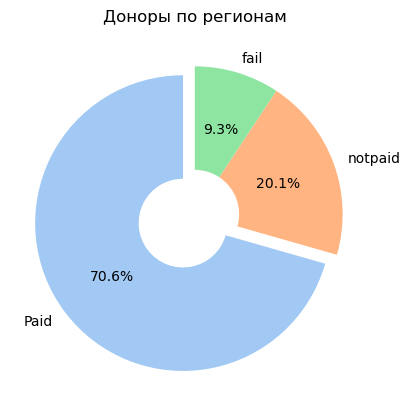

In [361]:
order_df = order['status'].value_counts()
explode = (0.1,) + (0,)*2
colors = sns.color_palette('pastel')[ 0:3 ]

(order_df.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors = colors, 
            wedgeprops=dict(width=0.7), explode= explode))
plt.ylabel('');
plt.title('Доноры по регионам');

20% платежей зависло в неоплате, и более 9% с ошибкой. Взглянем поближе

In [362]:
notpaid = order[order['status']=='notpaid']

In [363]:
fail = order[order['status']=='fail']

In [364]:
print('Сумма зависших платежей: {:,} руб'.format(notpaid['price'].sum()))

Сумма зависших платежей: 30,474,239 руб


In [365]:
print('Сумма неудавшихся платежей: {:,} руб'.format(fail['price'].sum()))

Сумма неудавшихся платежей: 4,384,065 руб


In [366]:
notpaid.head()

,payment_id,action_id,ordering_datetime,in_touch_point_id,ext_touch_point_id,tot_price,vendor_code,new_year_promotion,recurrent,repayment,product_id,product_name,price,status,mindbox_id
40,94116,253112,2022-07-04 15:16:00,9,Site,50,22983,False,True,NaN,558,Пожертвование (хочу помочь),50,notpaid,7079
48,102699,632768,2022-11-23 11:42:00,9,Site,100,35418,False,False,NaN,34036,Игнатий Овчинников,100,notpaid,2734
49,103027,638702,2022-11-30 13:28:00,9,Site,50,35936,False,False,NaN,35013,Максим Широкин,50,notpaid,7079
55,106440,718413,2022-12-20 12:31:00,9,Site,500,37859,False,False,NaN,35013,Максим Широкин,500,notpaid,3361
59,108812,1715447,2023-01-25 19:08:00,9,Site,500,41614,False,False,NaN,38550,Никита Яковлев,500,notpaid,7390


Похоже, есть тенденция в колонках ext_touch_point_id и in_touch_point_id. Радует, что это не сбой какого-то дня. Также видно, что есть рекуррент со статусом notpaid - что странно, ведь это подписка и, следовательно, автоматическое списание.

In [367]:
display(notpaid['in_touch_point_id'].unique())
notpaid['ext_touch_point_id'].unique()

array([9], dtype=int64)

array(['Site'], dtype=object)

Все зависшие платежи оказались на сайте, нежели на 'Административный сайт Mindbox'. ВОзможно, это какая-то техническая проблема? Наврядли сайт может испытывать перегрузки, однако все ж проверим: посчитаем в какое время чаще всего зависала оплата

In [368]:
notpaid['timing'] = notpaid['ordering_datetime'].dt.hour
fail['timing'] = fail['ordering_datetime'].dt.hour
order['hour'] = order['ordering_datetime'].dt.hour

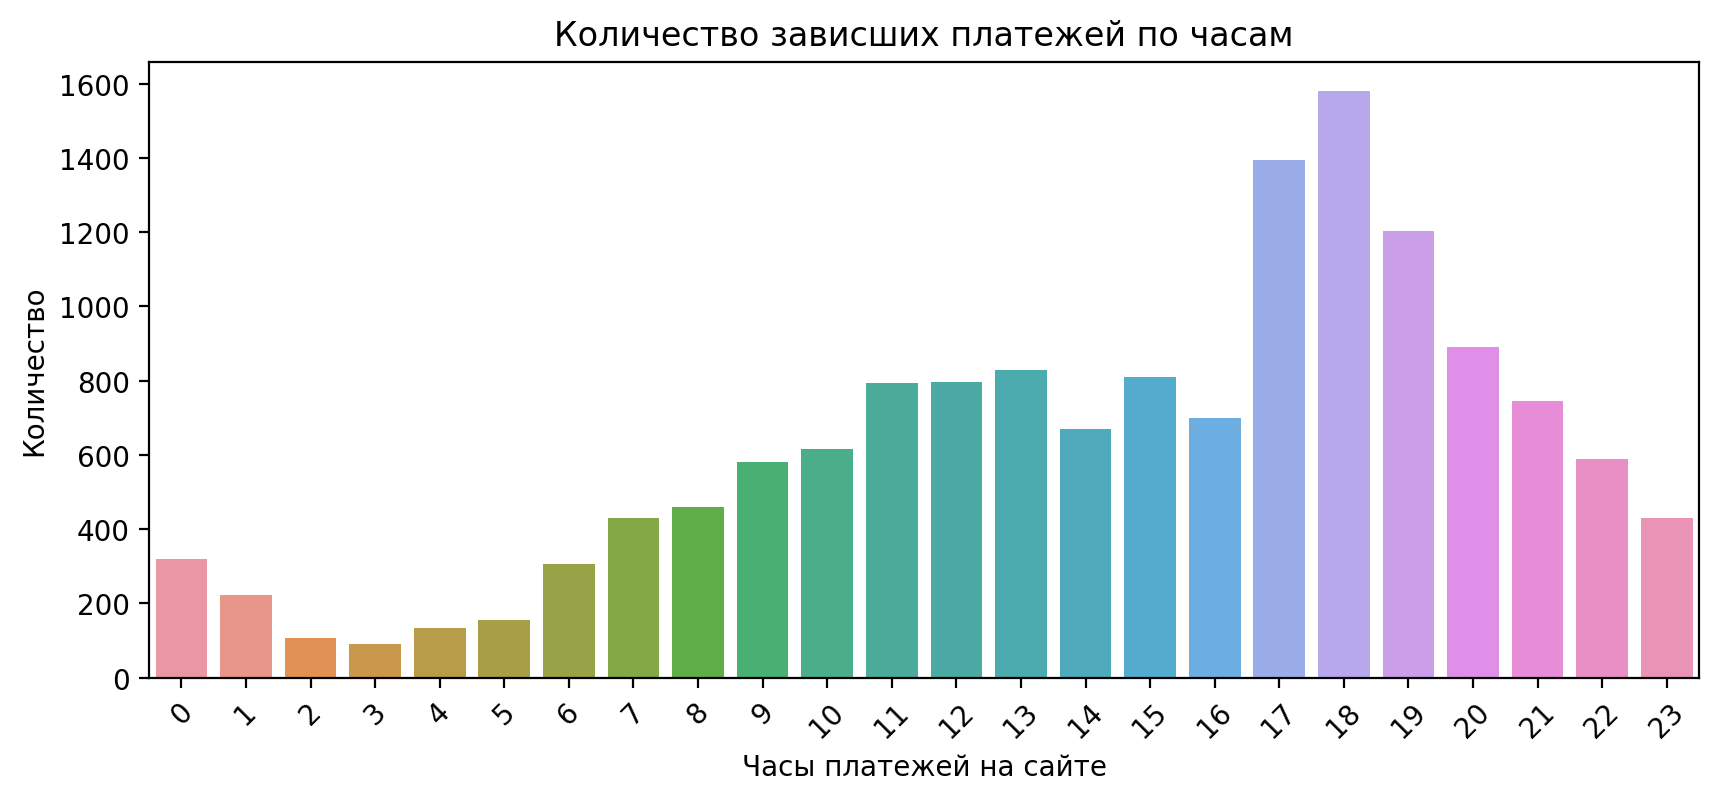

In [441]:
plt.figure(figsize=(10,4),dpi=200)
my_plot = sns.countplot(data=notpaid, x='timing')
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
plt.xlabel('Часы платежей на сайте')
plt.ylabel('Количество')
plt.title('Количество зависших платежей по часам')
plt.show()

Видно, что активность несколько возрастает после 13(т.е. после обеда). Возможно, пользователи действительно забывают оплатить. Посмотрим в совокупности с другими статусами

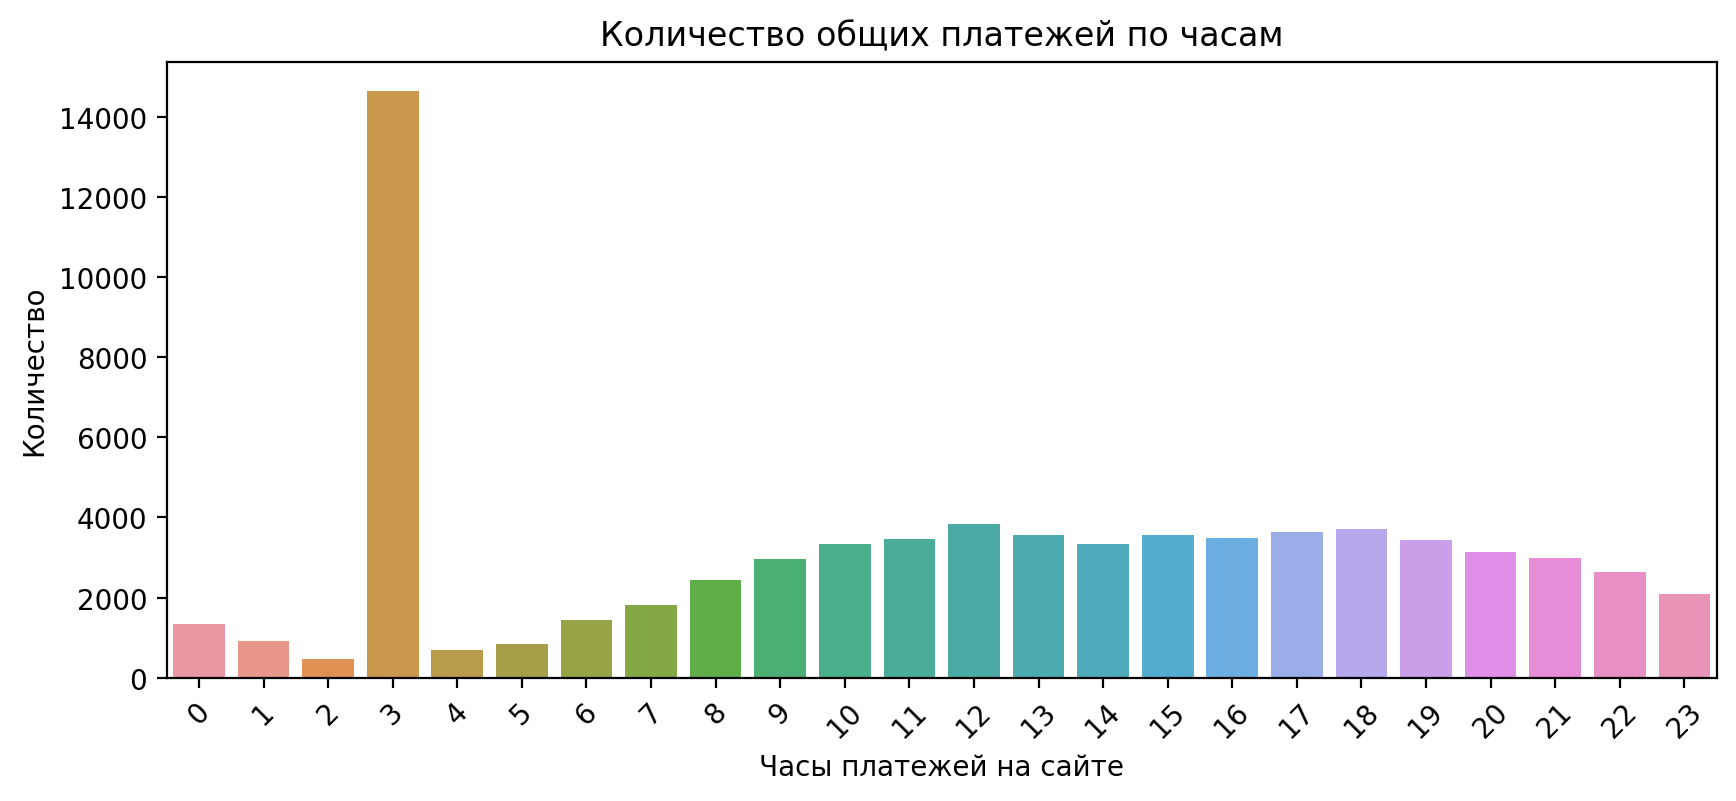

In [442]:
plt.figure(figsize=(10,4),dpi=200)
my_plot = sns.countplot(data=order, x='hour')
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
plt.xlabel('Часы платежей на сайте')
plt.ylabel('Количество')
plt.title('Количество общих платежей по часам')
plt.show()

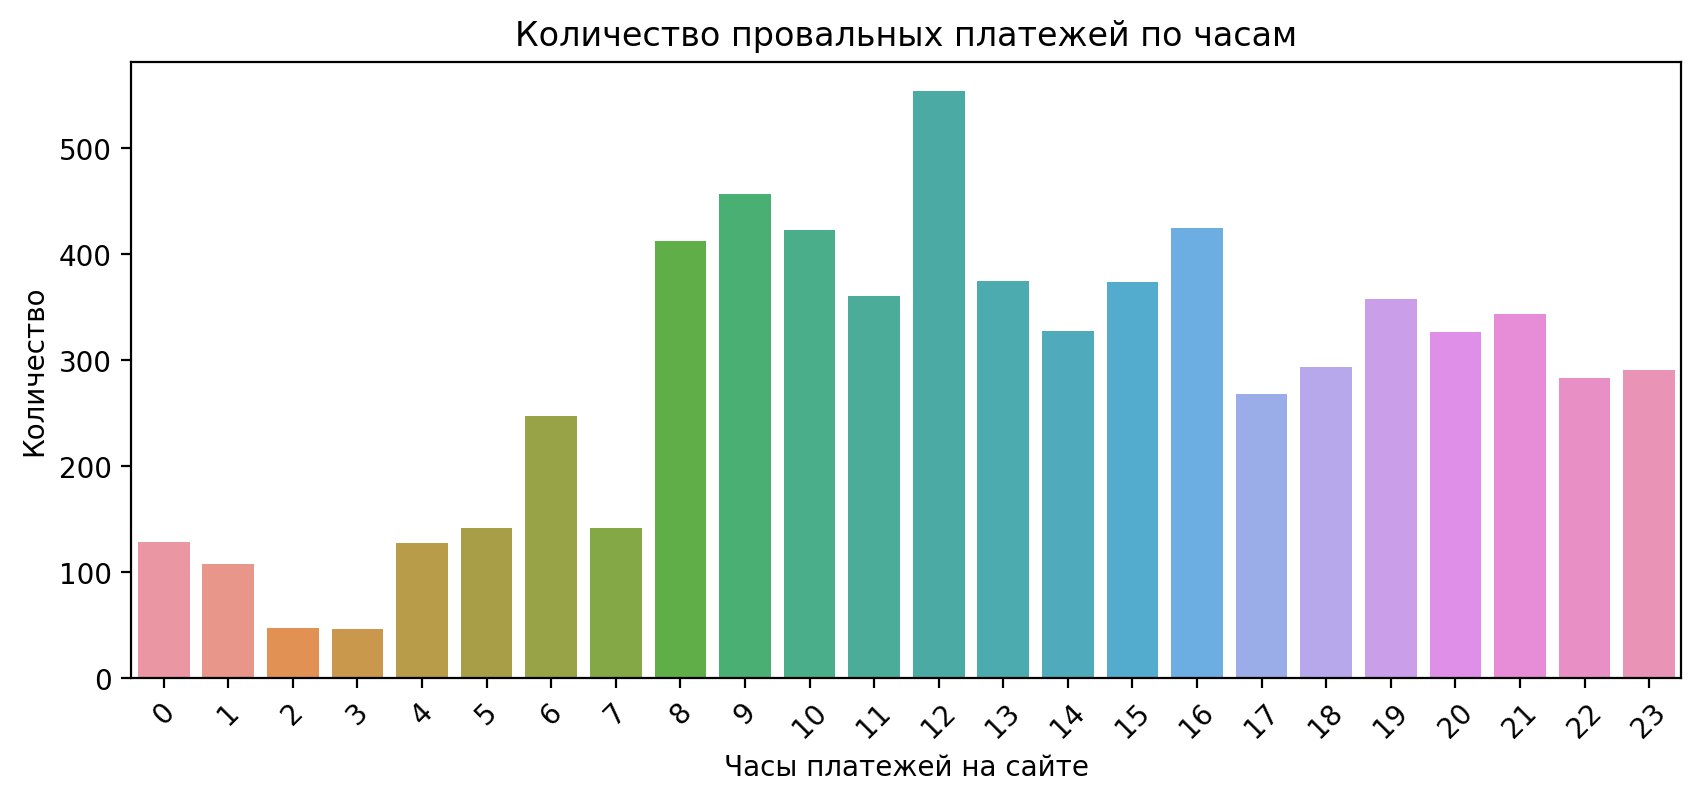

In [443]:
plt.figure(figsize=(10,4),dpi=200)
my_plot = sns.countplot(data=fail, x='timing')
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
plt.xlabel('Часы платежей на сайте')
plt.ylabel('Количество')
plt.title('Количество провальных платежей по часам')
plt.show()

Фейлы происходят вне какой-л зависимости от времени. Кажется, пользователи действительно где-то после обеда заходят и оставляют неоплаченным. Посмотрим сколько из них рекурренты

In [372]:
print('Рекурренты с зависшей оплатой:{:.1%}'.format(notpaid['recurrent'].sum()/notpaid.shape[0]))

Рекурренты с зависшей оплатой:18.6%


Кажется, 18 процентов для рекуррентов - немало, особенно учитывая, что конечная цель - сделать пользователя рекуррентом. Интересно, почему так происходит?

Скорее всего, такие рекуррентные платежи направлены на общюю деятельность организации

In [373]:
notpaid_product_names = notpaid[notpaid['recurrent'] == True]['product_name'].value_counts()
notpaid_product_names.head(10)

 Пожертвование регулярное       1220
На уставную деятельность        1013
 Пожертвование (хочу помочь)     294
 Пожертвование                    69
 Артём Матвеев                    10
 Кира Чубарова                     5
 Захар Кузьмин                     4
 Григорий Белослюдцев              3
 Егор Цуканов                      3
 Полина Чинкова                    3
Name: product_name, dtype: int64

Несколько необычно, что существует 4 разных вида регулярных пожертвований.

Интересно, какой процент всего от рекурентов составляют те, кто столкнулся с проблемой зависшей оплаты?

In [374]:
print('Рекурренты с зависшей оплатой:{:.1%}'.format(notpaid['recurrent'].sum()/order['recurrent'].sum()))
print('Количество рекуррентов со статусом notpaid:', notpaid['recurrent'].sum())
print('Количество рекуррентов:', order['recurrent'].sum())

Рекурренты с зависшей оплатой:30.6%
Количество рекуррентов со статусом notpaid: 2763
Количество рекуррентов: 9039


30% регулярных пожертвований остается в подвисшем виде? Это довольно много. Интересно, какой именно это убыток

In [375]:
print('Сумма зависших платежей рекуррентов: {:,} руб'.format(notpaid[notpaid['recurrent']==True]['price'].sum()))

Сумма зависших платежей рекуррентов: 3,599,717 руб


Радует, что из 30млн только 3.6млн - рекурренты. Интересно было бы узнать какие из них - новые

### unpickled_data

In [376]:
print(len(unpick := unpickled_data['user_action'].unique()))
for name in unpick:
    print(name)

1752
Копия Фандрайзинговая. Максим Широкин
Копия Фандрайзинговая. Максим Широкин Не доставлено
Копия Фандрайзинговая. Максим Широкин Отправка
Копия Копия Фандрайзинговая. Максим Широкин
Копия Копия Фандрайзинговая. Максим Широкин Не доставлено
Копия Копия Фандрайзинговая. Максим Широкин Отправка
Email признан невалидным
Изменение Email
Редактирование клиента
Импорт при переносе исторической базы клиентов
Оплата заказа
Изменение часового пояса клиентов при изменении региона
Переход на сайт
Показ попапа Подписка на вебпуши
Оформление заказа в операции Заказ - Создание неавторизованным
Изменился клиент, пользующийся устройством
Регистрация клиента в операции 'Заказ - Создание неавторизованным'
Объединение клиентов
Email признан валидным
Редактирование клиента в блоке сценария 'Новый сценарий 11456 - Шаги 2'
Счастливая история Василисы Николаевой
Счастливая история Василисы Николаевой Не доставлено
Счастливая история Василисы Николаевой Отправка
Фандрайзинговая. Максим Широкин
Фандрайзинго

#### Приведение к типу

In [377]:
# приведем к типу данных datetime в той главе
unpickled_data['action_date'] = pd.to_datetime(
    unpickled_data['action_date'], format='%Y-%m-%d')
unpickled_data['channel_id'] = unpickled_data['channel_id'].astype('string')

In [378]:
unpickled_data['utm_campaign'] = unpickled_data['utm_campaign'].astype('string')

In [379]:
unpickled_data['utm_source'] = unpickled_data['utm_source'].astype('string')

#### Названия каналов

Несмотря на то, что с числами работать быстрее - будет выгоднее заменить channel_id на простые названия каналов

In [380]:
for key,value in channels_dict.items():
    unpickled_data.loc[unpickled_data['channel_id'] == key, 'channel_id'] = value
unpickled_data.rename(
    columns={
        'channel_id':'channel'}, inplace=True)

#### Неявные дубликаты

In [381]:
unpickled_data['utm_medium'].unique()

array([nan, 'cpa', 'social', 'media', 'email', 'sms', 'qr', 'cpc',
       'pop-up', 'banner', 'cpm', 'messenger', 'qr,qr', 'free', 'cpaa',
       'webpush', 'partner', 'email,email', 'referral', 'cpc_grant',
       'cpc,cpc'], dtype=object)

Думаю, 'cpc','cpc,cpc' и 'email','email,email' можно соединить в одно

In [382]:
# убираем неявный дубликат
replacement = {'cpc':'cpc,cpc', 'qr':'qr,qr', 'email':'email,email', 'cpa':'cpaa'}
for right, wrong in replacement.items():
    unpickled_data['utm_medium'] = unpickled_data['utm_medium'].replace(wrong, right)

In [383]:
la = lambda cell: cell.split(',')[0] if ',' in str(cell) else cell
unpickled_data['utm_medium'] = unpickled_data['utm_medium'].apply(la)

In [384]:
np.sort(unpickled_data[~unpickled_data['utm_source'].isna()]['utm_source'].unique())

array(['UniSender', 'Unisender', 'aif_gazeta', 'aif_web', 'ambassadors',
       'dobroe-aif.ru/ostanin', 'dobroe.aif.ru',
       'dobroe.aif.ru,unisender', 'edna', 'facebook', 'instagram',
       'marketolog', 'megafon', 'mindbox', 'mosoblgaz', 'mts',
       'mtsmarketolog', 'ntv-tv', 'of-events', 'ok', 'otklikischool',
       'outlook', 'partners', 'quiz', 'razovie', 'reccurent', 'roditeli',
       'rollup', 'sanofi', 'sberegiplanetu.ru', 'squiz', 'telegram',
       'unisender', 'vk', 'vk_ads', 'whatsapp', 'yandex', 'yandex-direct',
       'zen.yandex'], dtype=object)

Есть неявные дубликаты вроде UniSender и unisender. Впрочем, почти все в нижнем регистре, поэтому если перевести оставшиеся значения - UniSender пропадет сам собой

In [385]:
unpickled_data['utm_source'] = unpickled_data['utm_source'].str.lower()
# замена dobroe.aif.ru,unisender
unpickled_data['utm_medium'] = unpickled_data['utm_medium'].replace('dobroe.aif.ru,unisender', 'unisender')

## Количество привлеченных пользователей по каналам (первое касание)

In [386]:
unpickled_data.groupby('user_id').agg({'action_date': 'min', 'channel': 'first'})\
                                .pivot_table(index = 'channel', values='action_date',aggfunc='count')\
                                .sort_values(by='action_date',ascending=False)

,action_date
channel,
Email,19427
Сайт,1995
Административный сайт Mindbox,1886
WebPush,133
utm_term Не указан,120
Прямой переход,103
vk.com,70
yandex.ru,35
instagram.com,18


"Административный сайт Mindbox" больше похож на загрузку пользователей в систему. По результатам доработки с заказчиком известно, что в апреле 2022г загрузили пользователей в систему. Тогда будет интересно посмотреть количество уникальных пользователей по годам

Много utm_term Не указан и Прямой переход - а у них часто есть источник привлечения. К примеру,АиФ заплатил за рекламу ВК - и оттуда пришел пользователь А: по прямой ссылке, поэтому channel будет Прямой переход, но из ВК(utm_source = vk). Поэтому дополнительно просмотрим по столбцу utm_source

In [387]:
channels_ef = unpickled_data.groupby('user_id').agg({'action_date': 'min', 'utm_source': 'first'})
channels_efficiency = channels_ef.pivot_table(index = 'utm_source', values='action_date',aggfunc='count')\
                                    .sort_values(by='action_date',ascending=False)
channels_efficiency

,action_date
utm_source,
vk,3792
mindbox,3398
yandex-direct,835
instagram,673
aif_gazeta,359
marketolog,317
mtsmarketolog,198
edna,134
aif_web,127


Здесь ситуация уже гораздо более интересная. Больше всех привлек ВК. Почти в 3 раза меньше - mindbox. Стоит уточнить что он имеет в виду

In [388]:
unpickled_data[unpickled_data['utm_source'] == 'mindbox']['utm_medium'].unique()

array(['email', 'pop-up', 'webpush'], dtype=object)

Выглядит как переход из имейлов по подпискам новостей, приветсвием новых посетителей и т.п. - в общем,вполне разумно, учитывая что система mindbox их и рассылает. Завершает топ-3 идет yandex-direct

Посмотрим на динамику по годам

In [389]:
channels_ef['year'] = channels_ef['action_date'].dt.year

In [390]:
channels_ef.pivot_table(index = 'utm_source',columns='year', values='action_date',aggfunc='nunique')

year,2021,2022,2023,2024
utm_source,,,,
aif_gazeta,21.0,33.0,135.0,25.0
aif_web,4.0,36.0,18.0,12.0
ambassadors,1.0,3.0,NaN,NaN
dobroe-aif.ru/ostanin,2.0,13.0,NaN,NaN
dobroe.aif.ru,3.0,2.0,15.0,5.0
edna,4.0,3.0,16.0,16.0
facebook,NaN,1.0,NaN,2.0
instagram,1.0,28.0,NaN,NaN
marketolog,31.0,60.0,32.0,NaN


Видно, что за 2024г данные еще не успели накопиться. Всегда функционировали каналы "aif_gazeta","aif_web", "vk" и "yandex-direct". 
Радует, что количество пользователей в большинстве растет стабильно. 

Такой анализ подойдет для общего обзора и постоянных каналов(прямые переходы/сайт и т.п.), но на эффективность других каналов привлечения лучше смотреть с учетом того времени, на которое они покупались

## общая эффективность каналов (касание делить на общее количество)

In [391]:
channels_efficiency['efficiency, %'] = round(channels_efficiency['action_date']/(channels_efficiency['action_date'].sum()) * 100,2)
channels_efficiency

,action_date,"efficiency, %"
utm_source,,
vk,3792,36.56
mindbox,3398,32.76
yandex-direct,835,8.05
instagram,673,6.49
aif_gazeta,359,3.46
marketolog,317,3.06
mtsmarketolog,198,1.91
edna,134,1.29
aif_web,127,1.22


Почти весь трафик составляют vk и mindbox. В дальнейшем стоит уделить им особое внимание

## new & old

### разделение базы на новых пользователей и исторический импорт

In [392]:
# по импорту разделим пользователей
new_users = unpickled_data[~unpickled_data['user_id'].isin(import_df['CustomerActionCustomerIdsMindboxId'])]\
                .sort_values(by='action_date')
old_users = unpickled_data[unpickled_data['user_id'].isin(import_df['CustomerActionCustomerIdsMindboxId'])]\
                .sort_values(by='action_date')

### проанализировать какие каналы привлекают новых пользователей и эффективность каналов для новых пользователей

In [393]:
temp = new_users\
            .groupby('user_id').agg({'action_date': 'min', 'channel': 'first'})\
            .pivot_table(index = 'channel', values='action_date',aggfunc='count')\
             .sort_values(by='action_date',ascending=False)
temp['efficiency, %'] = round(temp['action_date']/(temp['action_date'].sum()) * 100,2)
temp

,action_date,"efficiency, %"
channel,,
Сайт,8268,50.18
Email,3409,20.69
Административный сайт Mindbox,1991,12.08
utm_term Не указан,969,5.88
Прямой переход,713,4.33
yandex.ru,354,2.15
vk.com,296,1.80
instagram.com,136,0.83
roditeli,107,0.65


In [394]:
new_users[new_users['channel'] == 'Email'].tail()

,user_action,action_date,channel,utm_campaign,utm_source,utm_medium,user_id,action_time
738761,RFM. Письмо 2 Отправка,2024-03-18,Email,<NA>,<NA>,NaN,43717,7
738789,RFM. Письмо 2 Отправка,2024-03-18,Email,<NA>,<NA>,NaN,43718,7
738790,RFM. Письмо 2,2024-03-18,Email,<NA>,<NA>,NaN,43718,7
739026,RFM. Письмо 2 Отправка,2024-03-18,Email,<NA>,<NA>,NaN,43721,7
739027,RFM. Письмо 2,2024-03-18,Email,<NA>,<NA>,NaN,43721,7


Видели выше и убедились снова - Email(которого немало в датафрейме)- отображение общих действий, поэтому здесь и далее анализируем по столбцу utm_source

In [395]:
source_new_users = new_users\
            .groupby('user_id').agg({'action_date': 'min', 'utm_source': 'first'})\
            .pivot_table(index = 'utm_source', values='action_date',aggfunc='count')\
             .sort_values(by='action_date',ascending=False)
source_new_users['efficiency, %'] = round(source_new_users['action_date']/(source_new_users['action_date'].sum()) * 100,2)
display(source_new_users)
top_10 = source_new_users.head(10).index

,action_date,"efficiency, %"
utm_source,,
vk,3831,44.43
mindbox,1514,17.56
yandex-direct,996,11.55
instagram,730,8.47
aif_gazeta,361,4.19
marketolog,283,3.28
mtsmarketolog,178,2.06
aif_web,144,1.67
edna,109,1.26


Что ж, разрез новых пользователей не сильно отличается от общего обзора. Ранее рассматривали mindbox, в этот раз поближе познакомимся с yandex-direct

In [396]:
new_users[new_users['utm_source'] == 'yandex-direct']['utm_campaign'].unique()

<StringArray>
['Кампания_Полина_Чинкова_CPA_Россия_17-05-2022',
        'Кампания_Полина_Чинкова_CPC_16-05-2022',
       '_Кампания_Полина_Чинкова_CPC_16-05-2022',
               'Polina-chinkova_CPC_no_graphics',
               'Polina-chinkova_CPA_no_graphics',
                                      '74316780',
                                             '0',
                                      '79926331',
                                      '82150215',
                                      '95332332',
                                      '95708450',
                                      '99343074',
                                     '105529376']
Length: 13, dtype: string

Кампания_Полина_Чинкова закончилась в 2022г. Не ясно что значат остальные идентификаторы( Похоже, yandex-direct активно не пользовались

In [397]:
# проверим теорию
df = new_users[new_users['utm_source'] == 'yandex-direct']

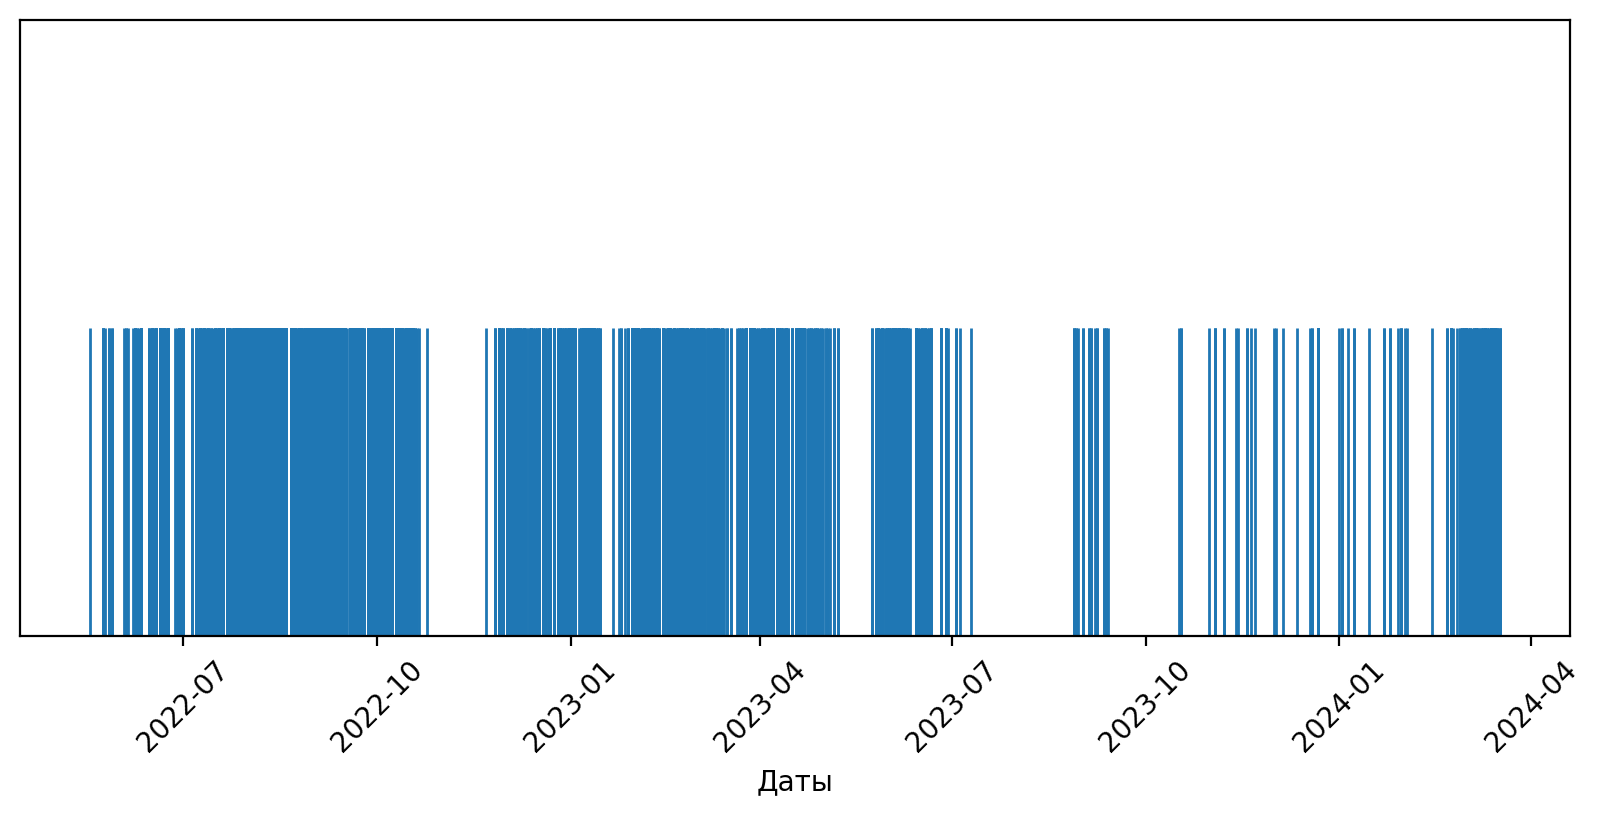

In [398]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,4),dpi=200)
my_plot = sns.rugplot(x='action_date',data=df,height=0.5)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
plt.ylim(0,1)
plt.yticks([])
my_plot.set(ylabel=None)
plt.xlabel("Даты");

в ноябре 2022 и осенью 2023 были пробелы. Странная осенняя тенденция) Зато в марте 2024 канал привлечения активизировался. Скорее всего вся его популярность в топе обоснована данными до августа 2023

Последний в топ-4: instagram. Посмотрим на старых пользователей

In [399]:
old_users\
        .groupby('user_id').agg({'action_date': 'min', 'channel': 'first'})\
        .pivot_table(index = 'channel', values='action_date',aggfunc='count')\
        .sort_values(by='action_date',ascending=False)

,action_date
channel,
Административный сайт Mindbox,5701
Сайт,1452
Прямой переход,129
utm_term Не указан,30
vk.com,12
org.telegram.messenger,6
yandex.ru,6
instagram.com,5
google.com,2


Стоит также посмотреть по utm_source и  в сравнении с новыми

In [400]:
def one_plot_creator(df, x, y, color, text=None,
                     title='default tittle', xaxis_title='default xaxis tittle', yaxis_title='default yaxis tittle',
                     legend_title='default legend tittle', barmode='stack',
                     orientation='v', height=500, showlegend=True, for_export=False):

    fig = px.bar(df, x=x, y=y, color=color, text=text, barmode=barmode)

    fig.update_layout(
        height=height,
        showlegend=showlegend,
        title=title,
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
        legend_title=legend_title
    )
    
    if for_export == True:
        fig.update_layout({
            'plot_bgcolor': 'rgba(0, 0, 0, 0)',
            'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        })

    return fig

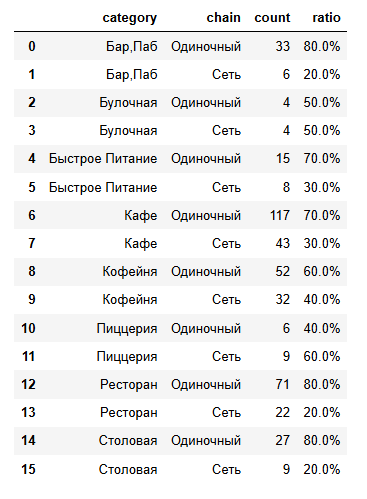

In [401]:
source_old_users = (old_users
                    .groupby('user_id').agg({'action_date': 'min', 'utm_source': 'first'}) # выделим первый источник
                    .pivot_table(index = 'utm_source', values='action_date',aggfunc='count') # посчитаем количество
                    .reset_index(names='channel'))

source_old_users['efficiency, %'] = round(source_old_users['action_date']/(source_old_users['action_date'].sum()) * 100,2)             
source_old_users['user'] = 'old'

In [402]:
source_new_users = source_new_users.reset_index(names='channel')

In [403]:
source_new_users['user'] = 'new'

In [404]:
data_subcategory = pd.concat([source_new_users,source_old_users])

In [405]:
fig = one_plot_creator(
    df=data_subcategory,
    x='channel', y='action_date', color='user', text='efficiency, %',
    title='Соотношение сетевых и несетевых заведений по категориям',
    xaxis_title='Категория', yaxis_title='Количество',
    legend_title='Обозначение',height=450
)
fig.show()

unisender -предыдущийаналог MondBox. Не удивительно, что его много. Однако, необычно что mindbox также оказался в топе. ВК, как выяснили, работал всегда. В целом очевидно, что ребята неплохо выросли с новыми пользователями. Посмотрим теперь на динамику каналов

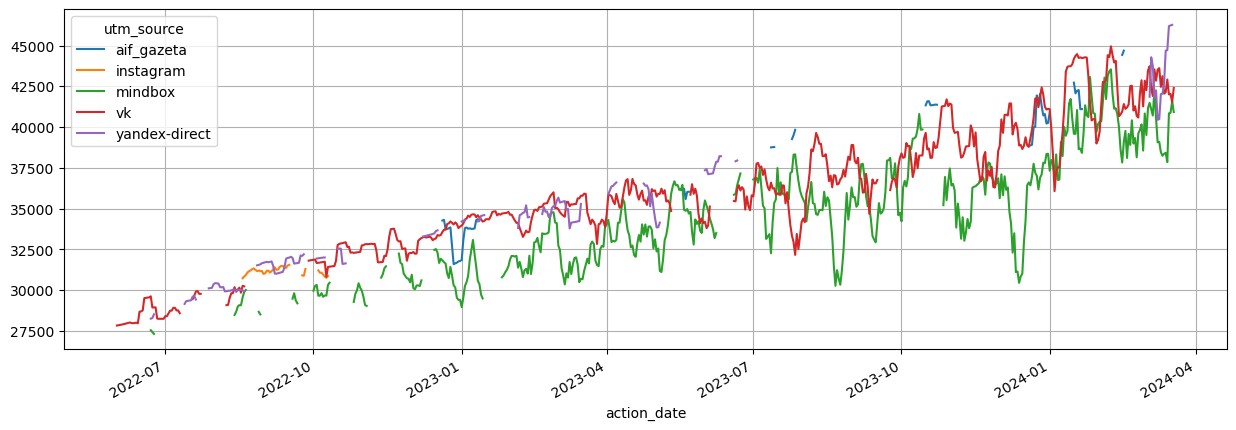

In [406]:
(new_users[(new_users['utm_source'].isin(top_10[:5]))] # пришлось ограничить, тк график был нечитаем
.pivot_table(
    index='action_date',  # даты первых посещений
    columns='utm_source',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='first'  # подсчёт первого захода пользователя - сработает в силу сортировки по дате выше
).rolling(7) #скользящее среднее - 1 недели
.mean())\
.plot(figsize=(15, 5), grid=True);

Кажется, сервис стабильно растет - все больше и больше пользователей. Самые стабильные - vk и mindbox. Виден какой-то разрыв в данных около июня 2023. Каких-то выраженных активностей или тенденций нет. 

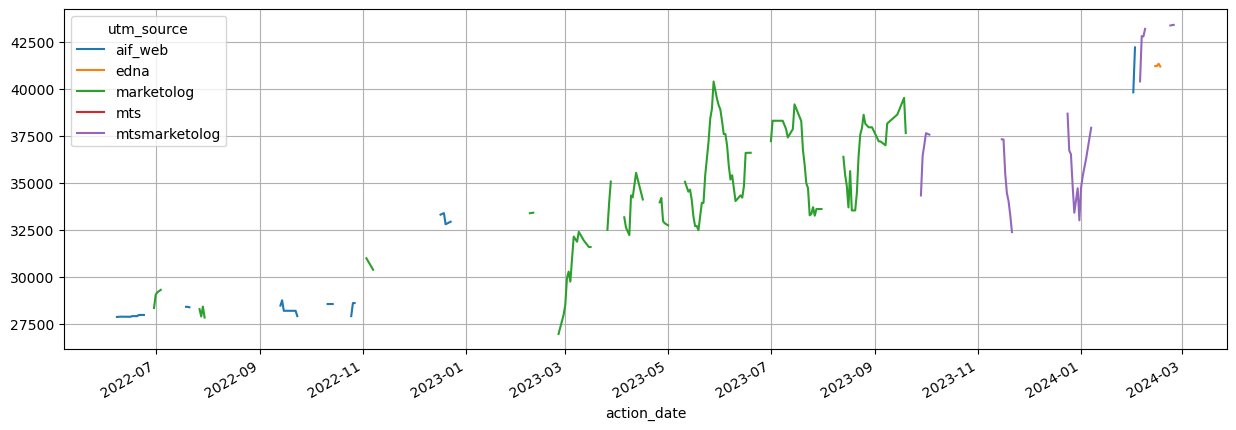

In [407]:
(new_users[(new_users['utm_source'].isin(top_10[5:]))] # пришлось ограничить, тк график был нечитаем
.pivot_table(
    index='action_date',  # даты первых посещений
    columns='utm_source',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='first'  # подсчёт первого захода пользователя - сработает в силу сортировки по дате выше
).rolling(7) #скользящее среднее - 2 недели
.mean())\
.plot(figsize=(15, 5), grid=True);

Каждый из каналов просуществовал нестабильно, в какой-то промежуток. 

In [408]:
active_and_old = unpickled_data[(unpickled_data['user_id'].isin(old_users['user_id'])) 
                                & (unpickled_data['action_date'].dt.year == 2024)]

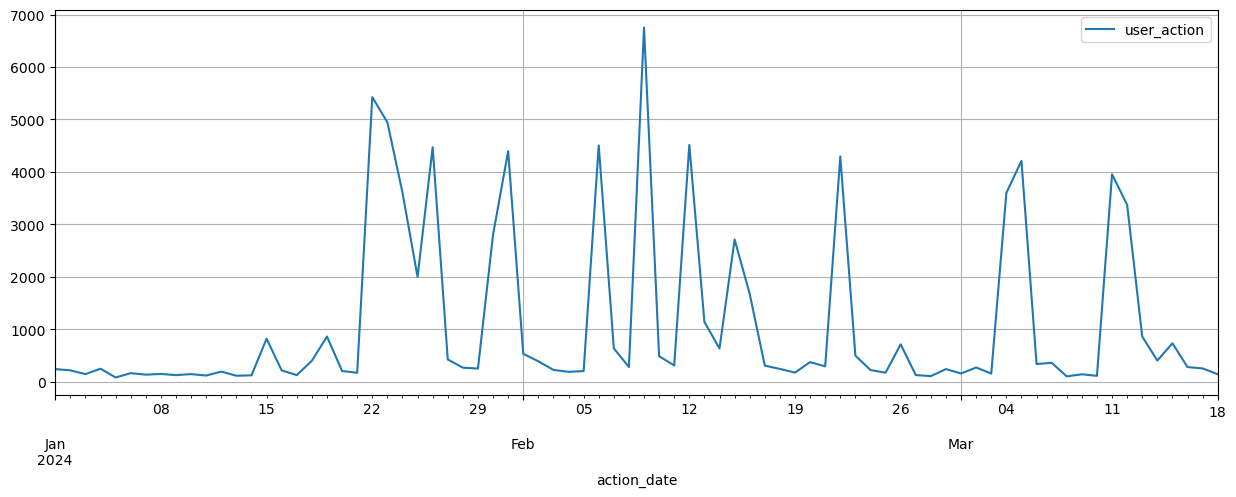

In [409]:
active_and_old.groupby('action_date').agg({'user_action':'count'}).plot(figsize=(15, 5), grid=True);

Есть пользователи, которые активны со старого, исторического импорта - т.е. возможно, уже 3 года с АиФ. Интересно, донатят ли так же?

In [410]:
order[(order['mindbox_id'].isin(active_and_old['user_id'])) 
      & (order['ordering_datetime'].dt.year == 2024)
     & (order['status'] == 'Paid')]

,payment_id,action_id,ordering_datetime,in_touch_point_id,ext_touch_point_id,tot_price,vendor_code,new_year_promotion,recurrent,repayment,product_id,product_name,price,status,mindbox_id,hour
96,146567,244491755,2024-01-28 08:41:00,9,Site,50,128040,False,True,True,49909,Пожертвование (хочу помочь),50,Paid,7079,8
97,148067,249840895,2024-02-04 13:56:00,9,Site,100,129566,False,False,NaN,111197,Захар Кузьмин,100,Paid,4982,13
98,149523,256419521,2024-02-13 21:55:00,9,Site,100,131146,False,False,NaN,106525,Дарья Семенова,100,Paid,4982,21
99,151312,265017652,2024-02-28 08:42:00,9,Site,50,133051,False,True,True,49909,Пожертвование (хочу помочь),50,Paid,7079,8
197,145234,237695521,2024-01-18 19:39:00,9,Site,100,126704,False,True,True,49909,Пожертвование (хочу помочь),100,Paid,7735,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30699,154396,277803279,2024-03-17 11:06:00,9,Site,25,136214,False,False,NaN,134644,Глеб Пестов,25,Paid,27011,11
34197,146189,241873072,2024-01-24 16:32:00,9,Site,520,127659,False,False,NaN,118369,Муххамад Бисултанов,520,Paid,28803,16
34198,149427,256125539,2024-02-13 13:33:00,9,Site,1500,131022,False,False,NaN,106525,Дарья Семенова,1500,Paid,29335,13
65286,145168,237286584,2024-01-18 07:56:00,9,Site,1100,126638,False,False,NaN,118369,Муххамад Бисултанов,1100,Paid,43103,7


## RFM анализ - в процессе доработки и не нуждается в проверке

In [411]:
# для аналза предоставляют интерес данные о активностях и монетизации - order

In [412]:
rfm = unpickled_data.groupby('user_id').agg({'action_date': ['min', 'max'], 'user_id':'count'}).reset_index()
rfm.columns = ['user_id', 'start_date', 'finish_date', 'total_visits']

In [413]:
rfm['days_active'] = ((rfm.finish_date - rfm.start_date) / pd.Timedelta('1d') + 1).astype('int')
now = unpickled_data['action_date'].max() + pd.Timedelta('1d')

In [414]:
rfm['days_inactive'] = rfm.finish_date.apply(lambda cell: (now - cell) / pd.Timedelta('1d')).astype('int')

In [415]:
rfm.days_inactive.describe()

count    23820.000000
mean        63.041604
std        130.978075
min          1.000000
25%          7.000000
50%          8.000000
75%         75.000000
max       1149.000000
Name: days_inactive, dtype: float64

In [416]:
inactive_q1 = np.quantile(rfm.days_inactive, .25)
inactive_q3 = np.quantile(rfm.days_inactive, .75)
inactive_iqr = inactive_q3 - inactive_q1

In [417]:
inactive_top = inactive_q3 + inactive_iqr * 1.5

In [418]:
pd.qcut(rfm[rfm.days_inactive < inactive_top].days_inactive, 3).unique()

[(14.0, 176.0], (0.999, 7.0], (7.0, 14.0]]
Categories (3, interval[float64, right]): [(0.999, 7.0] < (7.0, 14.0] < (14.0, 176.0]]

In [419]:
inactive_bins = [0, 11, 56, rfm.days_inactive.max()]
inactive_labels = [3, 2, 1]

In [420]:
rfm['R'] = pd.cut(rfm.days_inactive, bins=inactive_bins, labels=inactive_labels)

In [421]:
rfm.total_visits.describe()

count    23820.000000
mean       120.275105
std        144.495761
min          1.000000
25%         61.000000
50%        112.000000
75%        148.000000
max      10473.000000
Name: total_visits, dtype: float64

In [422]:
rfm['visits_per_day'] = rfm.total_visits / rfm.days_active

In [423]:
visits_q1 = np.quantile(rfm.visits_per_day, .25)
visits_q3 = np.quantile(rfm.visits_per_day, .75)
visits_iqr = visits_q3 - visits_q1

In [424]:
visits_top = visits_q3 + visits_iqr * 1.5

In [425]:
pd.qcut(rfm[rfm.visits_per_day < visits_top].visits_per_day, 3).unique()

[(0.00379, 0.225], (0.225, 0.375], (0.375, 1.206]]
Categories (3, interval[float64, right]): [(0.00379, 0.225] < (0.225, 0.375] < (0.375, 1.206]]

In [426]:
visit_bins = [0, .245, .37, rfm.visits_per_day.max()]
visit_labels = [1, 2, 3]

In [427]:
rfm['F'] = pd.cut(rfm.visits_per_day, bins=visit_bins, labels=visit_labels)

In [428]:
pays = order[order.status == 'Paid']

In [429]:
m_value = pays.groupby('mindbox_id')['price'].sum().reset_index()
m_value

,mindbox_id,price
0,2734,51
1,2847,1000
2,2861,120
3,3361,3000
4,4982,840
...,...,...
18716,46782,500
18717,46783,120
18718,46784,300
18719,46787,300


In [432]:
rfm = rfm.join(m_value, on='user_id', how='left')

In [435]:
rfm = rfm.dropna()

,user_id,start_date,finish_date,total_visits,days_active,days_inactive,R,visits_per_day,F,mindbox_id,price
0,2734,2021-03-18,2024-02-09,65,1059,39,2,0.061379,1,20532.0,100.0
1,2847,2021-06-16,2024-03-12,183,1001,7,3,0.182817,1,20764.0,15.0
2,2861,2021-03-16,2024-03-15,165,1096,4,3,0.150547,1,20795.0,500.0
3,3361,2022-03-19,2023-02-20,28,339,393,1,0.082596,1,22013.0,50.0
4,4982,2021-01-01,2024-03-12,178,1167,7,3,0.152528,1,25431.0,500.0
...,...,...,...,...,...,...,...,...,...,...,...
2566,18710,2022-03-19,2024-02-09,61,693,39,2,0.088023,1,46774.0,500.0
2567,18713,2021-04-21,2024-02-09,118,1025,39,2,0.115122,1,46779.0,1000.0
2568,18714,2022-03-19,2024-03-12,119,725,7,3,0.164138,1,46780.0,500.0
2569,18717,2021-09-12,2024-02-09,173,881,39,2,0.196368,1,46783.0,120.0


In [436]:
rfm.price.describe()

count      2571.000000
mean       1587.084792
std       14699.888810
min           0.000000
25%         300.000000
50%         500.000000
75%        1000.000000
max      556600.000000
Name: price, dtype: float64

In [438]:
len(set(rfm.user_id).intersection(set(m_value.mindbox_id)))

1916

In [439]:
rfm.shape

(2571, 11)